**Описание проекта**

Интернет-магазин продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Магазин — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Как решать задачу**

Продумывать подход к решению этой задачи вам не придётся — руководитель отдела его уже сформировал:
    
Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
Нужно собрать данные по клиентам по следующим группам:
    
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.
Руководство одобрило описание решения, и вам, как специалисту по DS, нужно его реализовать.


**Описание данных**

Данные для работы находятся в нескольких таблицах. Нажмите на название файла, чтобы его скачать.

market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

money.csv

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## Загрузка данных

In [3]:
!pip install scikit-learn==1.1.3 -q
!pip install missingno -q
!pip install phik -q
!pip install shap -q
!pip install optuna -q
!pip install optuna-integration[sklearn] -q

     |████████████████████████████████| 97 kB 1.3 MB/s eta 0:00:011


In [75]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures, 
                                   OneHotEncoder, 
                                   MinMaxScaler, 
                                   OrdinalEncoder,
                                   LabelEncoder)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import phik
import shap
from phik import resources, phik_matrix
import missingno as msno
import optuna
from optuna.integration import OptunaSearchCV 
from optuna import distributions

In [5]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

market_file.name = 'market_file'
market_money.name = 'market_money'
market_time.name = 'market_time'
money.name = 'money'

pd.set_option('display.max_columns', None)
files = [market_file, market_money, market_time, money]

for i in files:
    print('\n', i.name)
    display(i.sample(10))


 market_file


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
309,215657,Снизилась,премиум,да,5.6,5,736,0.32,Косметика и аксесуары,2,4,5,4
104,215452,Снизилась,стандарт,да,3.8,4,756,0.90,Товары для детей,2,3,6,4
494,215842,Снизилась,премиум,да,4.3,3,1036,0.94,Товары для детей,4,2,3,9
798,216146,Прежний уровень,стандарт,да,4.8,4,799,0.24,Товары для детей,4,4,9,8
660,216008,Прежний уровень,стандарт,да,6.1,4,953,0.26,Домашний текстиль,5,2,5,10
944,216292,Прежний уровень,стандарт,да,5.9,4,397,0.17,Домашний текстиль,3,4,2,12
751,216099,Прежний уровень,стандарт,да,4.2,5,673,0.14,Товары для детей,3,2,7,9
134,215482,Снизилась,премиум,да,2.7,3,602,0.25,Косметика и аксесуары,2,5,5,2
830,216178,Прежний уровень,стандарт,нет,3.3,4,353,0.18,Товары для детей,2,2,6,15
99,215447,Снизилась,стандарт,да,2.4,5,511,0.94,Товары для детей,3,2,3,3



 market_money


,id,Период,Выручка
2638,216227,текущий_месяц,4912.2
955,215666,текущий_месяц,5150.4
3164,216402,предыдущий_месяц,5148.0
1431,215825,препредыдущий_месяц,5053.0
1038,215694,препредыдущий_месяц,5204.0
3830,216624,предыдущий_месяц,5565.5
1592,215878,текущий_месяц,5683.2
477,215507,текущий_месяц,4794.2
134,215392,предыдущий_месяц,4548.0
2421,216155,текущий_месяц,5969.2



 market_time


,id,Период,минут
2305,216500,текущий_месяц,16
2060,216378,текущий_месяц,16
483,215589,предыдцщий_месяц,8
841,215768,текущий_месяц,9
313,215504,предыдцщий_месяц,11
2397,216546,текущий_месяц,14
1777,216236,предыдцщий_месяц,14
359,215527,текущий_месяц,8
1718,216207,текущий_месяц,21
1885,216290,текущий_месяц,12



 money


,id,Прибыль
338,215686,3.07
406,215754,2.69
516,215864,2.97
753,216101,4.17
494,215842,1.33
930,216278,3.70
567,215915,3.50
261,215609,4.29
664,216012,4.17
1071,216419,4.38


In [6]:
for i in files:
    print('\n', i.name)
    display(i.describe())


 market_file


,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000



 market_money


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000



 market_time


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000



 money


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


In [7]:
for i in files:
    print('\n', i.name, '\n',)
    display(i.info())


 market_file 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса

None


 market_money 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None


 market_time 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None


 money 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

**Предварительно данные выглядят нормально. Кое-где возможны некоторые выбросы, но это мы увидим в исследовательском анализе.**

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

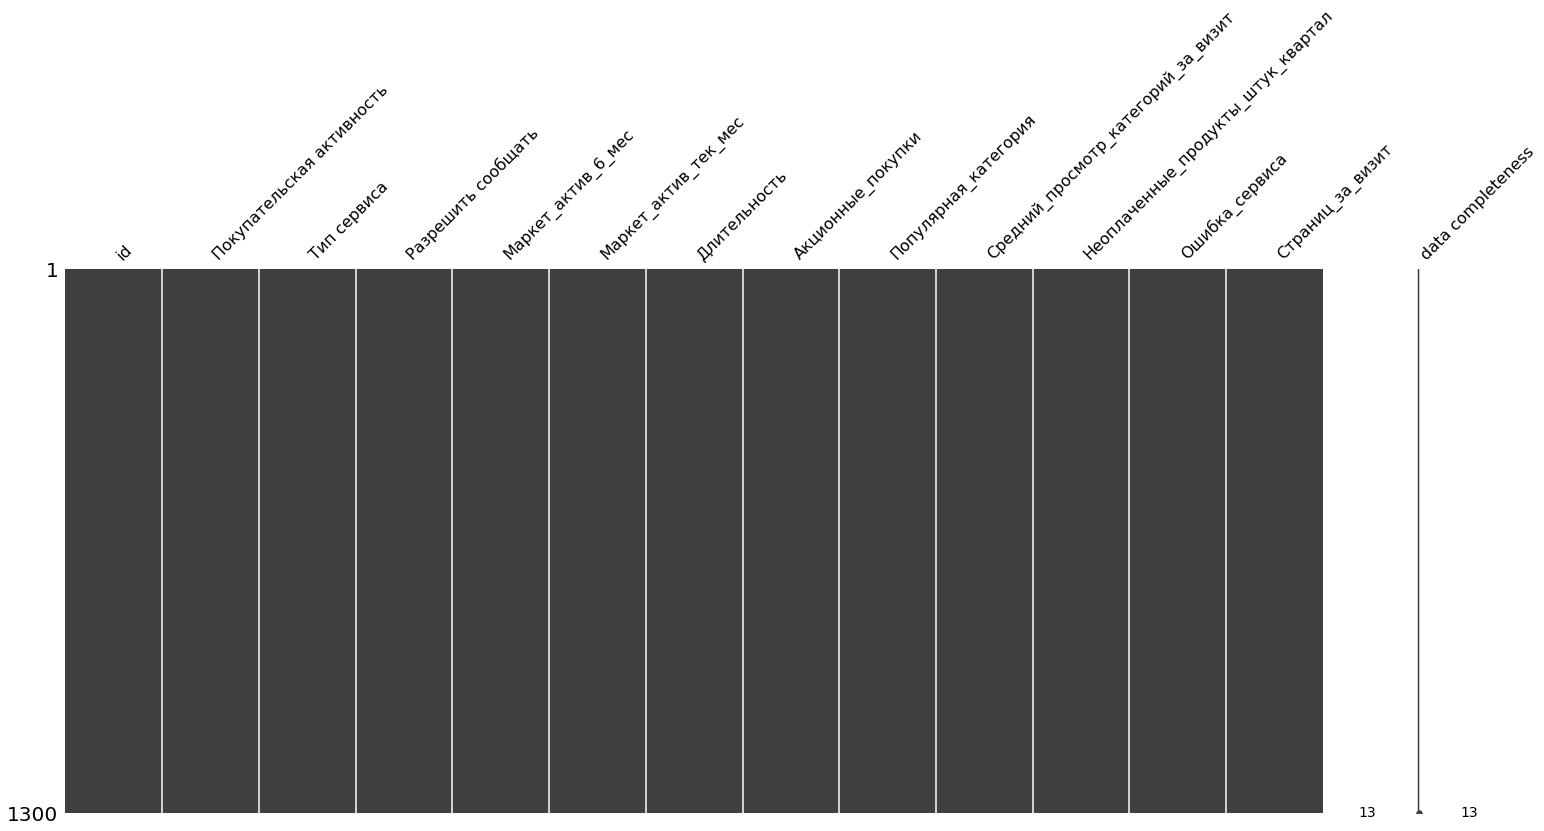

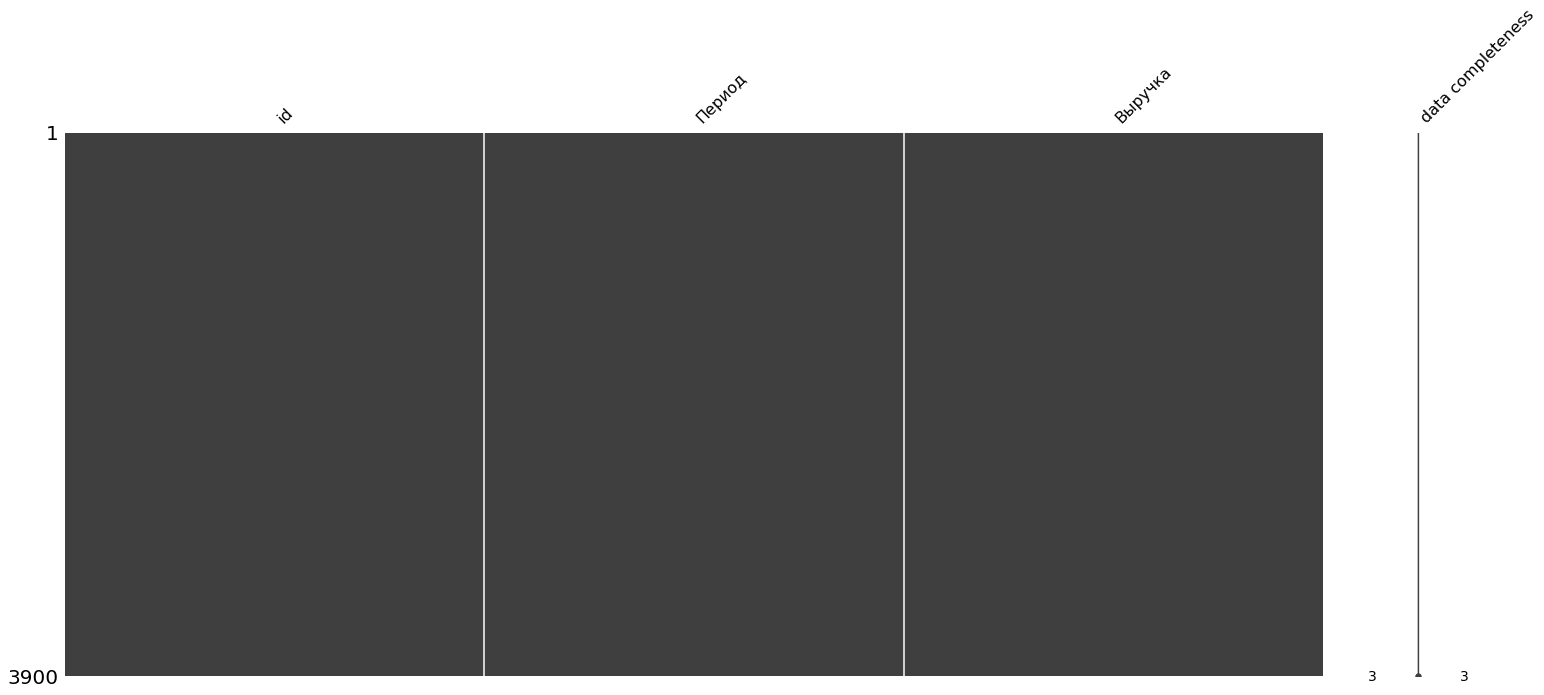

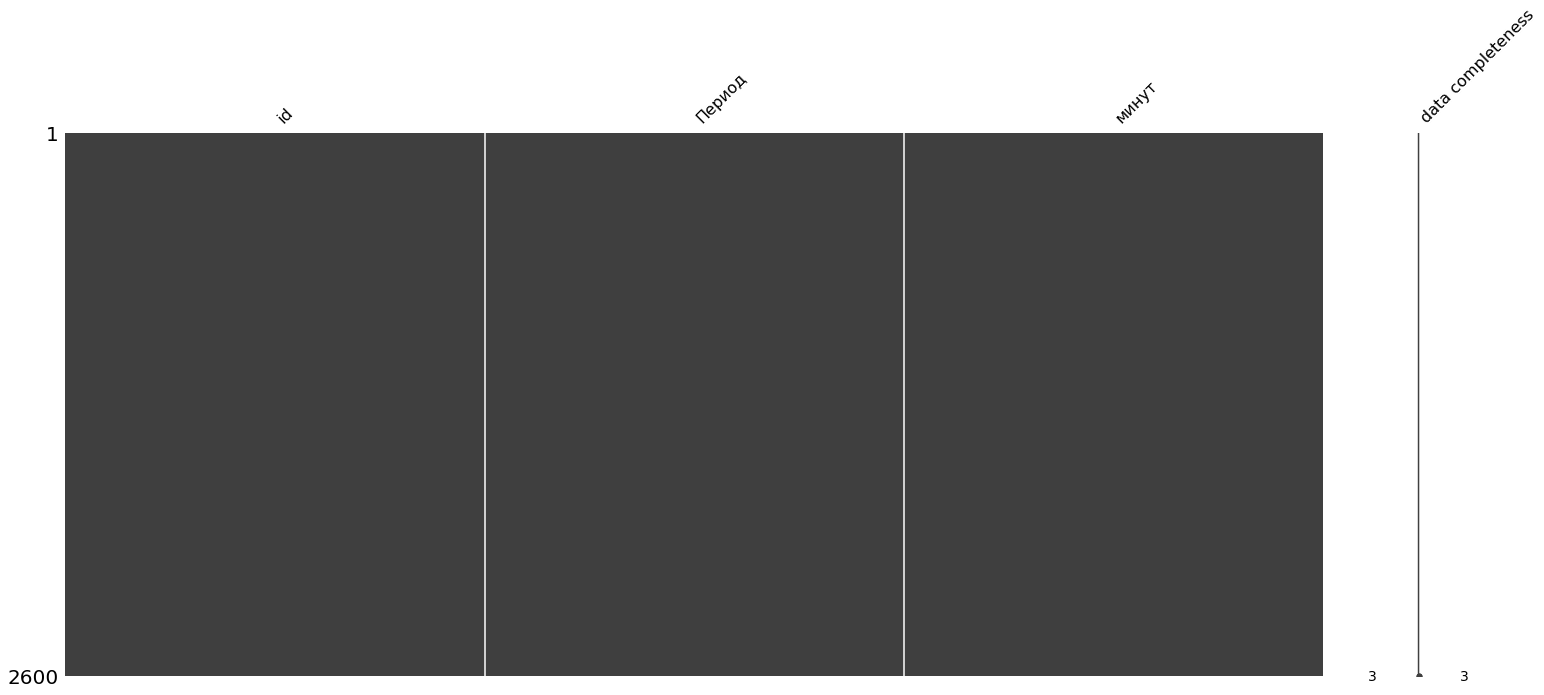

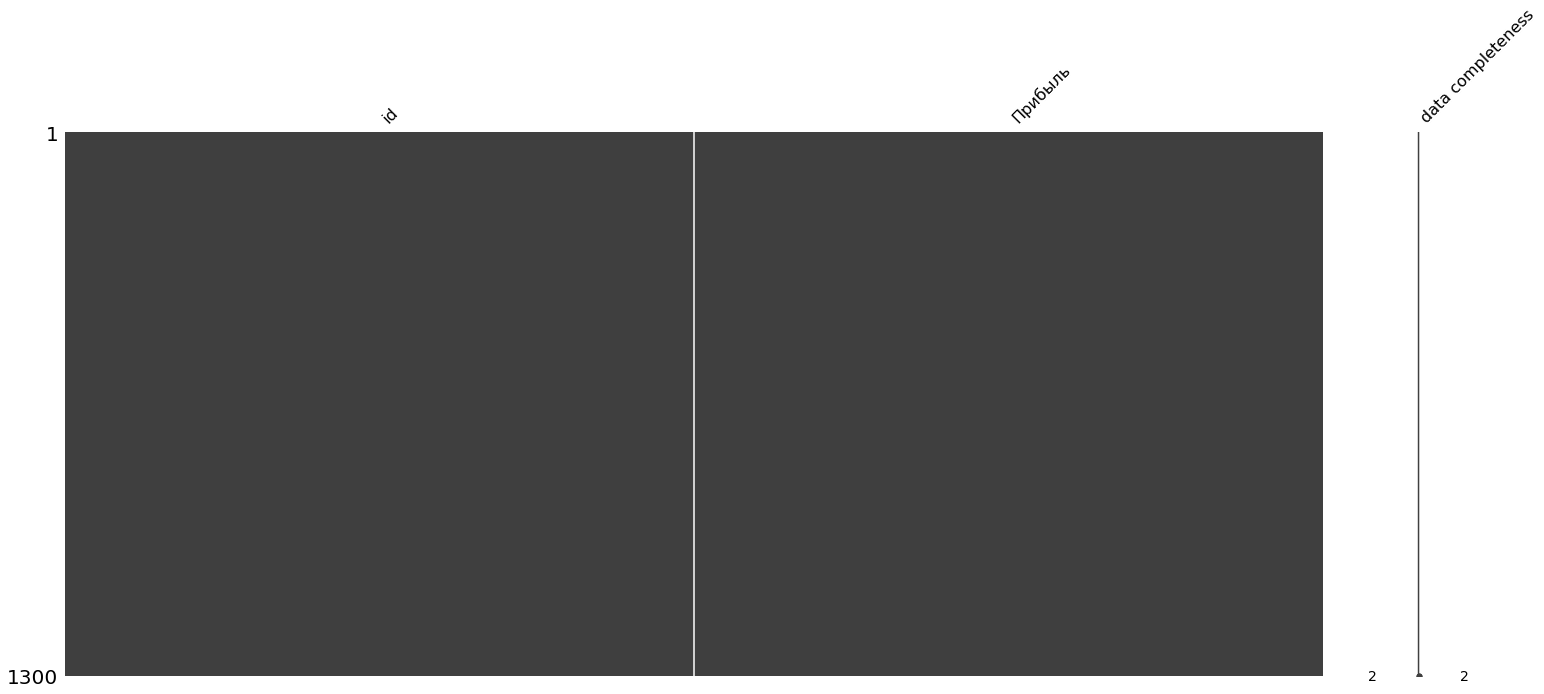

In [8]:
for i in files:
    display (msno.matrix(i, labels=True))

plt.show()

**На предварительном изучении пропусков данных в таблицах не обнаружено!**

### Вижу следующие проблемы:
- **Неплохо бы привести надписи к str типу и малому регистру;**
- **Проверю все на явные и неявные дубликаты, а также на опечатки.**

## Предобработка данных

In [9]:
for i in files:
    print('\n', i.name)
    display(i.isna().sum())


 market_file


id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64


 market_money


id         0
Период     0
Выручка    0
dtype: int64


 market_time


id        0
Период    0
минут     0
dtype: int64


 money


id         0
Прибыль    0
dtype: int64

**Пробежимся по каждой таблице и приведем все текстовые данные к нижнему регистру, дополнительно проверим на опечатки. Также заменим пробелы в названиях колонок на '_'**

In [10]:
#Написал 2 функции: для уменьшения регистра всех строчных типов и на поиск опечаток

def str_lower(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')
    cat = df.select_dtypes(exclude='number').columns.tolist()
    for i in cat:
        df[i] = df[i].astype(str).str.lower()
    return df

def check_errors(df):
    check = df.select_dtypes(exclude='number').columns.tolist()
    for k in check:
        df[k] = df[k].str.replace(' ','_')
        print (df.name, k)
        display(df[k].value_counts())

In [11]:
for i in files:
    str_lower(i)
    check_errors(i)

market_file покупательская_активность


прежний_уровень    802
снизилась          498
Name: покупательская_активность, dtype: int64

market_file тип_сервиса


стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64

market_file разрешить_сообщать


да     962
нет    338
Name: разрешить_сообщать, dtype: int64

market_file популярная_категория


товары_для_детей                        330
домашний_текстиль                       251
косметика_и_аксесуары                   223
техника_для_красоты_и_здоровья          184
мелкая_бытовая_техника_и_электроника    174
кухонная_посуда                         138
Name: популярная_категория, dtype: int64

market_money период


предыдущий_месяц       1300
текущий_месяц          1300
препредыдущий_месяц    1300
Name: период, dtype: int64

market_time период


текущий_месяц       1300
предыдцщий_месяц    1300
Name: период, dtype: int64

**Опечатки нашли, теперь устраним**

In [12]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт','стандарт')
market_file['популярная_категория'] = market_file['популярная_категория'].str.replace(
    'косметика_и_аксесуары','косметика_и_аксессуары')
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц','предыдущий_месяц')

**Проверим на дубликаты**

In [16]:
for df in files:
    if df.duplicated().sum() == 0:
        print(f'В таблице {df.name} явные дубликаты не обнаружены')
    else:
        print(f'Дубликатов в таблице {df.name} = {df.duplicated().sum()}')

В таблице market_file явные дубликаты не обнаружены
В таблице market_money явные дубликаты не обнаружены
В таблице market_time явные дубликаты не обнаружены
В таблице money явные дубликаты не обнаружены


### Итог раздела:
- **Привели названия колонок и строчные данные к нижнему регистру и избавились от пробелов;**
- **Проверили таблицы на неявные дубликаты - устранили;**
- **Явные дубликаты не обнаружены.**

## Исследовательский анализ данных

In [17]:
def g_hist(target,bins,a,b):
    plt.figure(figsize=(10, 6))

    sns.histplot(data=group_down[target], bins=bins, alpha=0.5, color='blue', label='Снизилась активность')
    sns.histplot(data=group_same[target], bins=bins, alpha=0.5, color='orange', label='Прежний уровень активности')

    plt.title(f'Сравнение распределения {a}', fontsize=14)
    plt.xlabel(f'{b}', fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

def g_box(a,b,c,d): 
    plt.figure(figsize=(10,6))
    sns.boxplot(data=a, x=b, palette='pastel')
    plt.title(f'Анализ показателей {c}', fontsize=14)
    plt.xlabel(f'{d}', fontsize=14)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.show()


def g_pie(a, b, r, ax):
    counts = a.value_counts()
    ax.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=r, 
        textprops={'fontsize': 14}, 
        radius=1.2
    )
    ax.set_title(f'Диаграмма соотношения {b}', fontsize=17)

**Сделал разделение по таргетному признаку**

In [18]:
group_down = market_file[market_file['покупательская_активность'] == 'снизилась']

group_same = market_file[market_file['покупательская_активность'] == 'прежний_уровень']

### Категориальные данные в таблице market_file

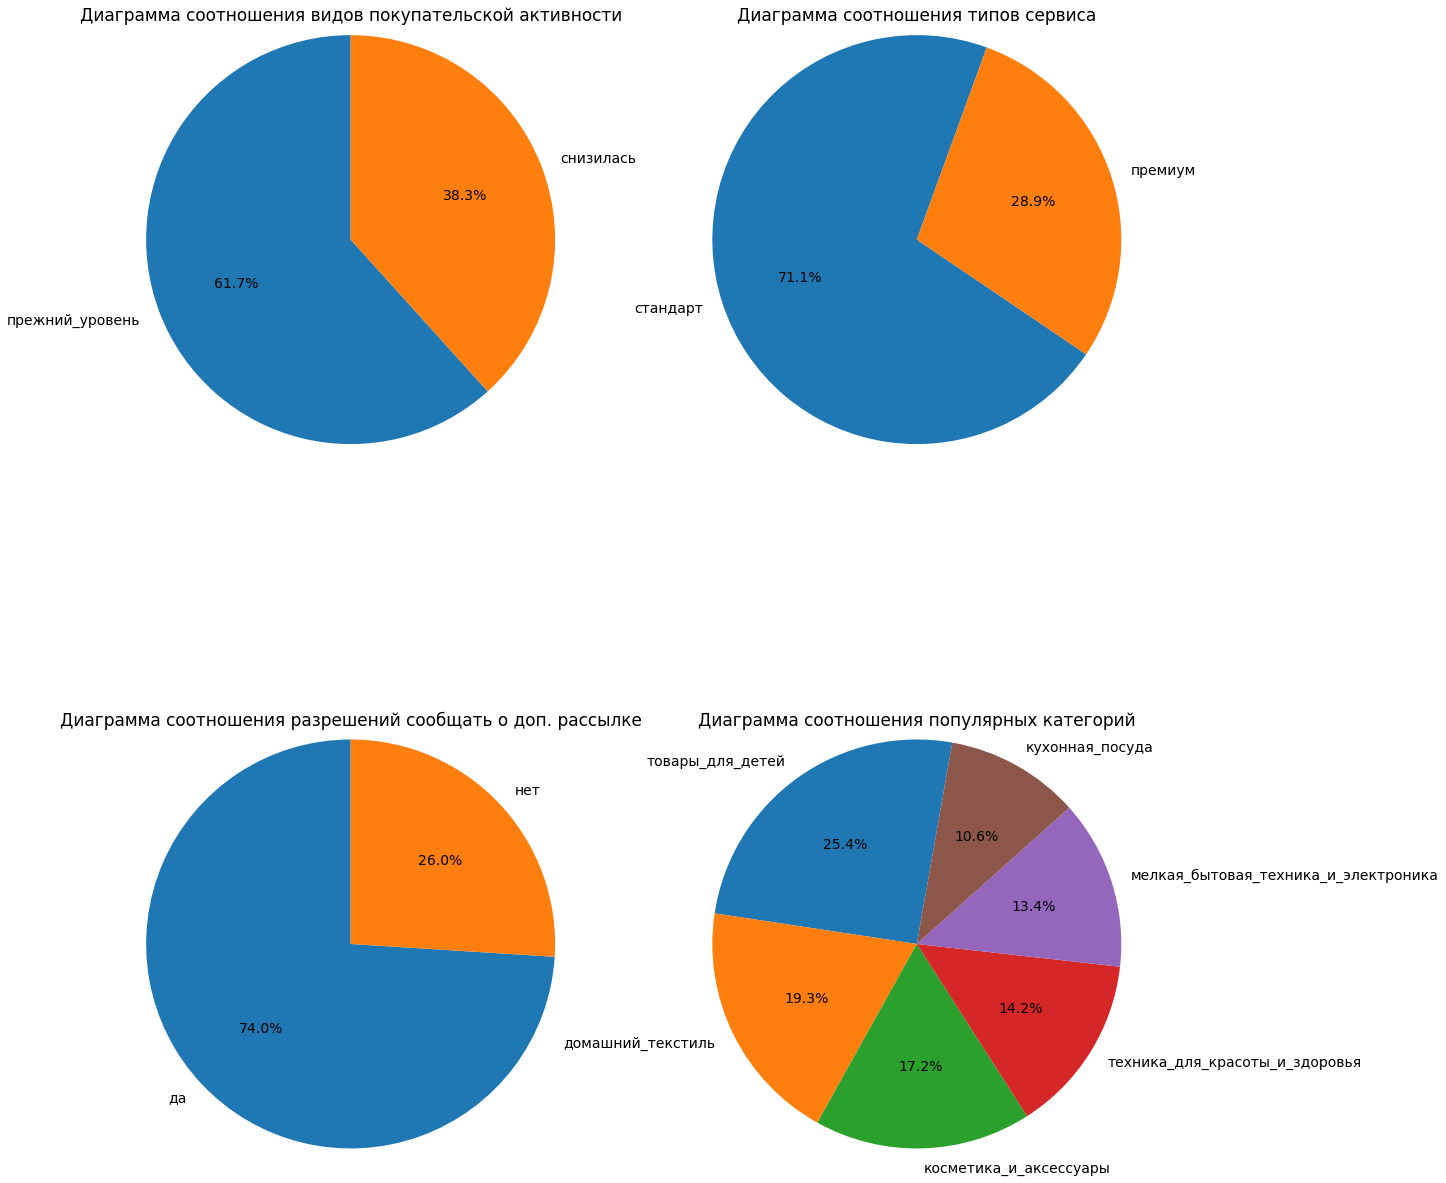

In [19]:
fig, axes = plt.subplots(2,2, figsize=(20,20))
g_pie(market_file['покупательская_активность'], 'видов покупательской активности', 90, axes[0,0])
g_pie(market_file['тип_сервиса'], 'типов сервиса', 70, axes[0,1])
g_pie(market_file['разрешить_сообщать'], 'разрешений сообщать о доп. рассылке', 90, axes[1,0])
g_pie(market_file['популярная_категория'], 'популярных категорий', 80, axes[1,1])
plt.tight_layout()
plt.show()

**Наблюдения:**
- **В покупательской активности преобладает статус Прежний уровень (61.7% наблюдений), тогда как статус Снизилась (38.3%);**
- **В типах сервиса преобладает статус Стандарт (71.1% наблюдений), тогда как статус Снизилась (28.9%);**
- **В подписках на дополнительные рассылки 74% статусов ДА (согласен на рассылку), когда статус НЕТ всего 26%;**
- **В популярных категориях чаще всего смотрят Домашний текстиль и Товары для детей, реже всего встречается категория Кухонная посуда.**

**Предварительно, кажется, что прежний уровень активности чаще у людей с Разрешенными доп. рассылками и уровнем сервиса Стандарт. Проверим гипотезу:**

In [20]:
def market_check(a,b):
    return market_file.loc[market_file[a]==b,['покупательская_активность']].value_counts()

print('Покупательская активность согласно типу сервиса - Стандарт', 2*'\n', 
      market_check('тип_сервиса', 'стандарт'),'\n'), 
print('Покупательская активность согласно разрешению на доп. рассылки - Да', 2*'\n', 
      market_check('разрешить_сообщать', 'да')), 

Покупательская активность согласно типу сервиса - Стандарт 

 покупательская_активность
прежний_уровень              596
снизилась                    328
dtype: int64 

Покупательская активность согласно разрешению на доп. рассылки - Да 

 покупательская_активность
прежний_уровень              591
снизилась                    371
dtype: int64


(None,)

**Ожидания подтвердились, но посмотрим обратную сторону с типом сервиса Премиум и отказом от рассылок:**

In [21]:
print('Покупательская активность согласно типу сервиса - Премиум', 2*'\n', 
      market_check('тип_сервиса', 'премиум'),'\n'), 
print('Покупательская активность согласно разрешению на доп. рассылки - Нет', 2*'\n', 
      market_check('разрешить_сообщать', 'нет')), 

Покупательская активность согласно типу сервиса - Премиум 

 покупательская_активность
прежний_уровень              206
снизилась                    170
dtype: int64 

Покупательская активность согласно разрешению на доп. рассылки - Нет 

 покупательская_активность
прежний_уровень              211
снизилась                    127
dtype: int64


(None,)

**Наглядной высокой зависимости покупательской активности от категориальных данных не прослеживается (она есть, но не настолько высокая, чтобы быть точно уверенным в словах), вероятнее всего дело в неравности распределения признаков в генеральной совокупности (со стандартной подпиской и разрешением на рассылки просто больше людей). Дальнешие догадки мы проверим в анализе Корреляции.**

### Количественные данные в таблице market_file

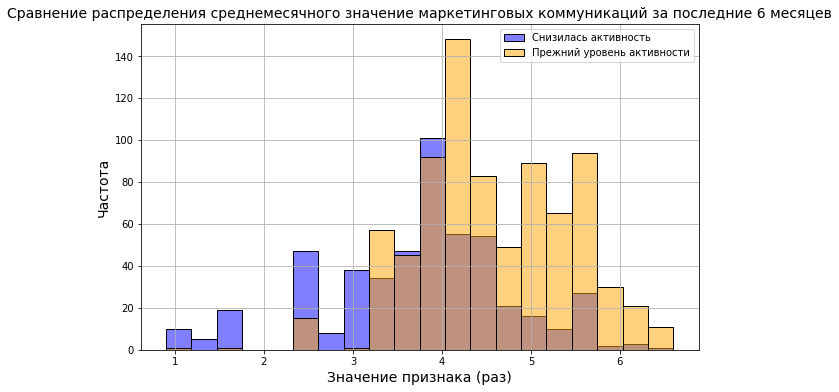

In [22]:
g_hist('маркет_актив_6_мес', 20, 
       'среднемесячного значение маркетинговых коммуникаций за последние 6 месяцев', 'Значение признака (раз)')

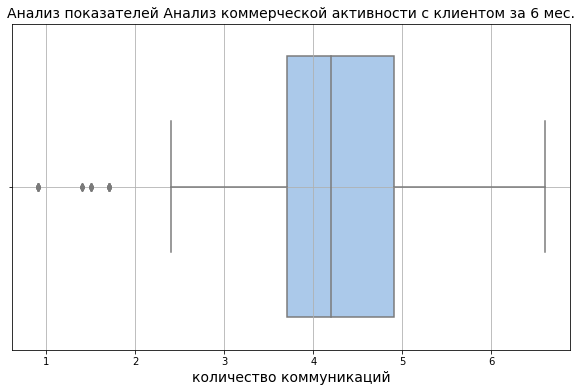

In [23]:
g_box(market_file, 'маркет_актив_6_мес', 
      'Анализ коммерческой активности с клиентом за 6 мес.', 'количество коммуникаций')


**Наблюдаем график распределения Cреднемесячных значений маркетинговых коммуникаций компании, которые приходились на покупателя за последние 6 месяцев. Эти значения показывают, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.**

*Распределение данных нормальное, хоть и есть небольшой провал в левой части графика. Говорит о том, что чаще приходится 4 и более коммуникаций, гораздо реже 3 и менее. Скорее всего ситуация зависит от запрета на дополнительные рассылки со стороны клиента.*

*Есть незначительные выбросы от 0 до 2 коммуникаций, но такое в реальности возможно. Выбросов мало, обрабатывать нет необходимости.*

*У клиентов со сниженной активностью маркетинговых коммуникаций ниже, как мы видим из графиков*

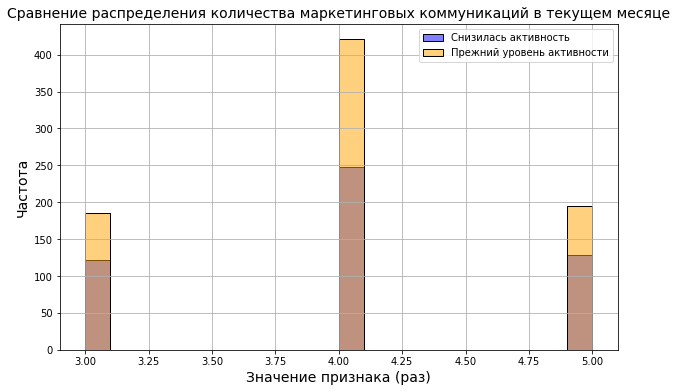

In [24]:
g_hist('маркет_актив_тек_мес', 20, 
       'количества маркетинговых коммуникаций в текущем месяце', 'Значение признака (раз)')

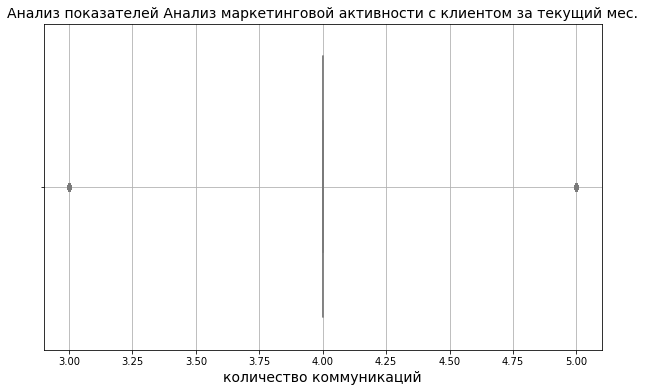

In [25]:
g_box(market_file, 'маркет_актив_тек_мес', 
      'Анализ маркетинговой активности с клиентом за текущий мес.', 'количество коммуникаций')

**Количество маркетинговых коммуникаций в текущем месяце.**

*Наблюдаем четкую кластеризацию. Проводится от 3 до 5 коммуникаций, 4ая и 5ая(скорее всего) - дополнительные рассылки, на которые подписано большинство пользователей.*

*При разбивке по группам покупательской активности мы видим четкое наложение графиков. Здесь ситуация одинаковая, признак коммуникаций за текущий месяц плохо описывает разделения целевого на классы.* 

*График ящика с усами не информативен здесь, поскольку у нас всего 3 уникальных значения. За норму он берет среднее*

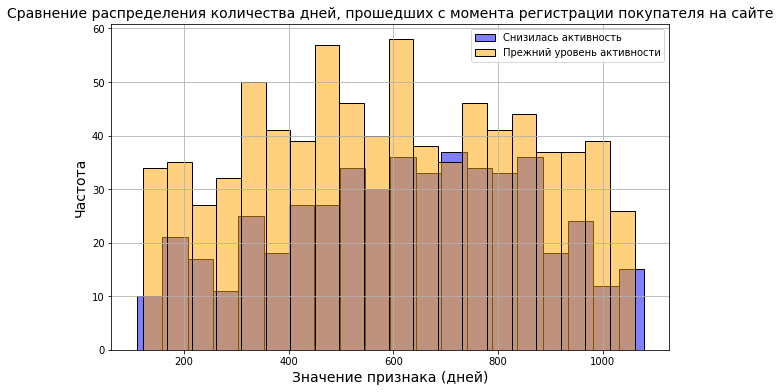

In [26]:
g_hist('длительность', 20, 
       'количества дней, прошедших с момента регистрации покупателя на сайте', 'Значение признака (дней)')

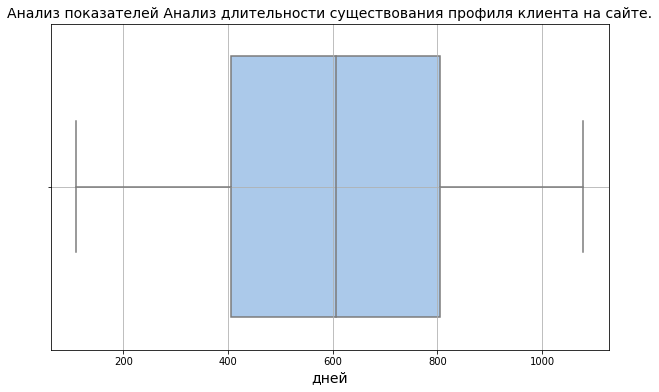

In [27]:
g_box(market_file, 'длительность', 
      'Анализ длительности существования профиля клиента на сайте.', 'дней')

**Длительность в днях с момента регистрации покупателя на сайте.**

*Признак распределяется нормально. Нобольше шумы на графике можно объяснить довольно скромным количеством наблюдений.*

*Нормой считается от 400 до 600 дней с момента регистрации*

*Со сниженной покупательской активностью больше старых клиентов, которые зарегистрировались от 600 до 800 дней назад.*

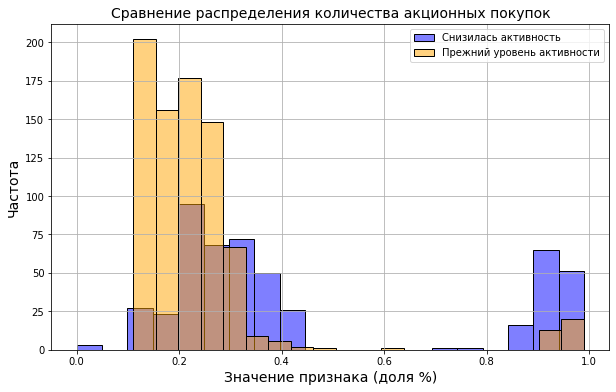

In [28]:
g_hist('акционные_покупки', 20, 
       'количества акционных покупок', 'Значение признака (доля %)')

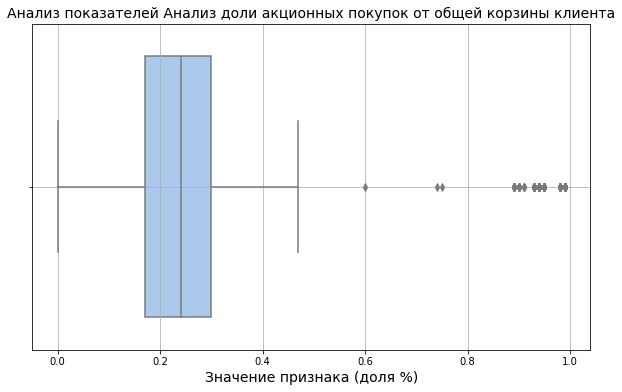

In [29]:
g_box(market_file, 'акционные_покупки', 
      'Анализ доли акционных покупок от общей корзины клиента', 'Значение признака (доля %)')

**Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.**

*Распределение не нормальное, есть аномальная просадка. Можно объяснить длительностью существования профилей покупателей на сайте и количеством акционных кампаний предприятия.*

*Заметно, что со сниженной покупательской активностью клиенты больше ориентируются на акционные товары. Иногда их доля составляет 100% от всех покупок в корзине.*

*Ящик говорит, что есть выбросы от 0.6 до 1.0. Такая ситуация реальна, обрабатывать не следует. Нормой считается от 20% до 30% акционных товаров от всех купленных товаров.*

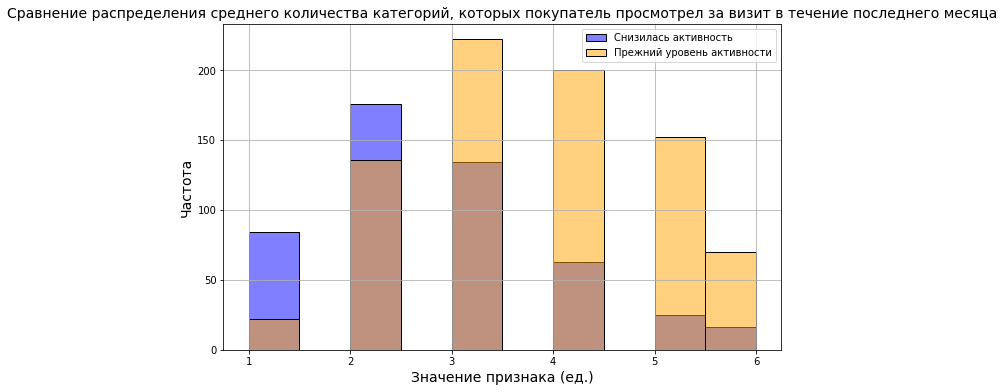

In [30]:
g_hist('средний_просмотр_категорий_за_визит', 10, 
       'среднего количества категорий, которых покупатель просмотрел за визит в течение последнего месяца', 
       'Значение признака (ед.)')

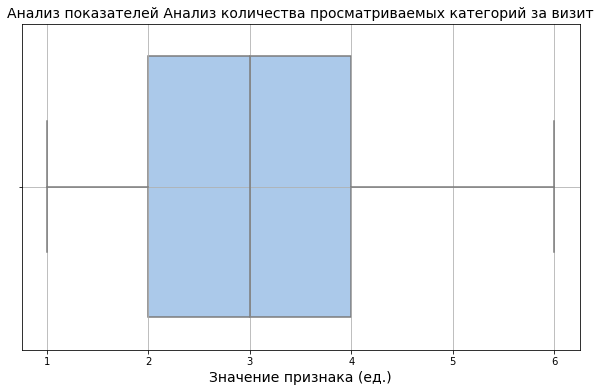

In [31]:
g_box(market_file, 'средний_просмотр_категорий_за_визит', 
      'Анализ количества просматриваемых категорий за визит', 'Значение признака (ед.)')

**В среднем чаще всего 3-4 категории покупатель просматривает за визит в течение последнего месяца.**

*Данные распределяются нормально*

*Нормой считается просмотр от 2 до 4 категорий*

*Со сниженной покупательской активностью клиенты смотрят меньше категорий за визит*

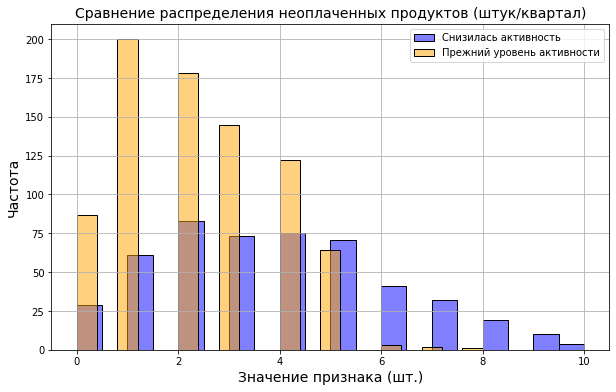

In [32]:
g_hist('неоплаченные_продукты_штук_квартал', 20, 
       'неоплаченных продуктов (штук/квартал)', 
       'Значение признака (шт.)')

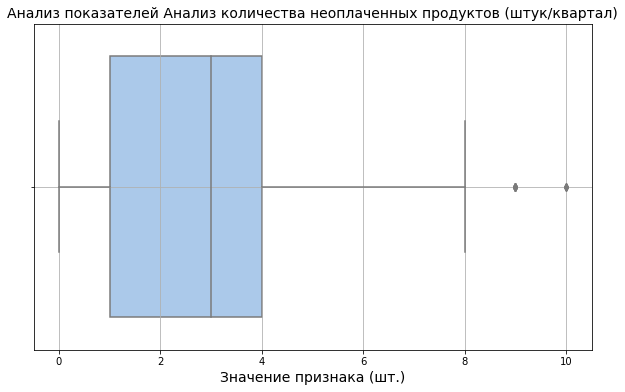

In [33]:
g_box(market_file, 'неоплаченные_продукты_штук_квартал', 
      'Анализ количества неоплаченных продуктов (штук/квартал)', 'Значение признака (шт.)')

**Общее число неоплаченных товаров в корзине за последние 3 месяца.**

*Распределение нормальное со смещением влево. Говорит о том, что корзины без оплаты остаются с малым количеством продуктов. Либо люди добавляют для удобства сравнения с конкурентами, либо на будущее в ожидании скидки.*

*Со сниженной активностью клиенты оставляют больше товаров неоплаченными. Либо в ождидании скидок, либо в итоге покупают выгоднее у конкурентов*

*Норма - 1-4 неоплаченных продукта в корзине*

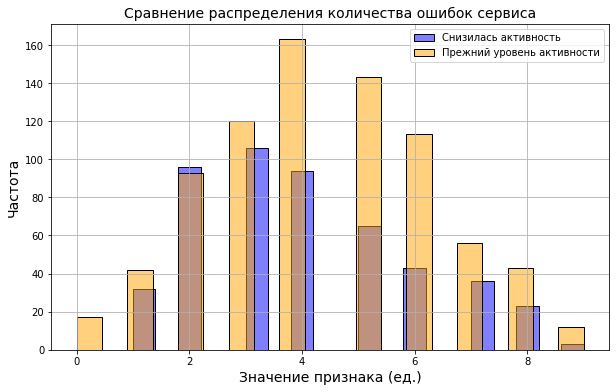

In [34]:
g_hist('ошибка_сервиса', 20, 'количества ошибок сервиса', 'Значение признака (ед.)')

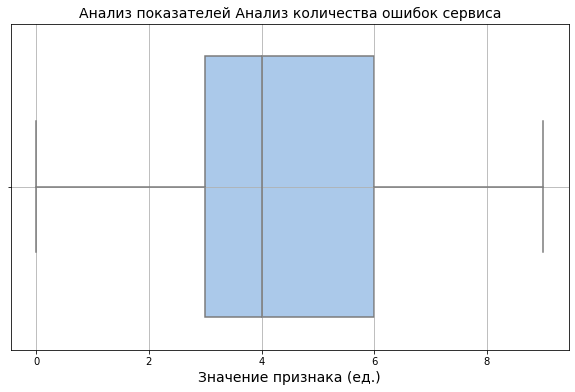

In [35]:
g_box(market_file, 'ошибка_сервиса', 
      'Анализ количества ошибок сервиса', 'Значение признака (ед.)')

**Распределение ошибок нормальное. Чаще всего пользователи сталкиваются с 4мя ошибками. Думаю, что значение обусловлено активностью пользователей и частотой их посещения сайта**

*Очевидно, выше активность = чаще сталкиваешься с ошибками*

*Норма согласно распределению - от 3 до 6 ошибок сервиса*

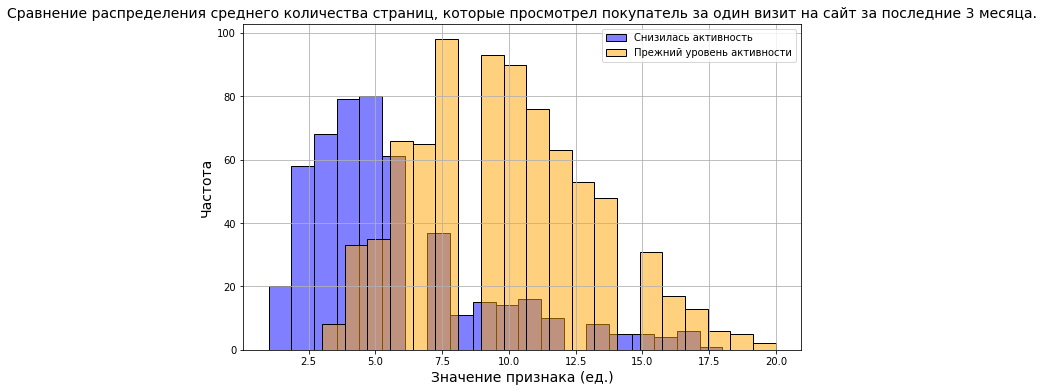

In [36]:
g_hist('страниц_за_визит', 20, 
       'среднего количества страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.',
       'Значение признака (ед.)')

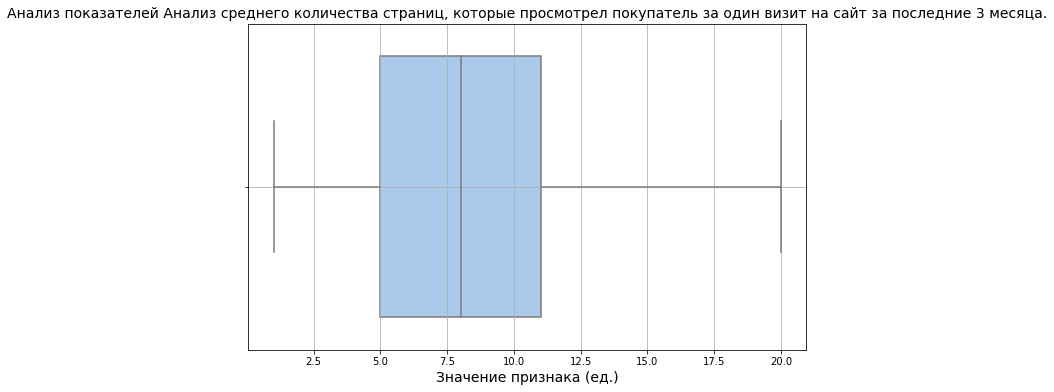

In [37]:
g_box(market_file, 'страниц_за_визит', 
      'Анализ среднего количества страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.', 
      'Значение признака (ед.)')

**Распределение нормальное с небольшим смещением влево. Чаще всего просматривают от 5ти до 10ти страниц за визит.**

*Согласно распределению нормой считается просмотр от 5 до 11 страниц за сессию*

*Покупатели со сниженной активностью смотрят гораздо меньше страниц товаров*

### Анализ данных в таблице market_money

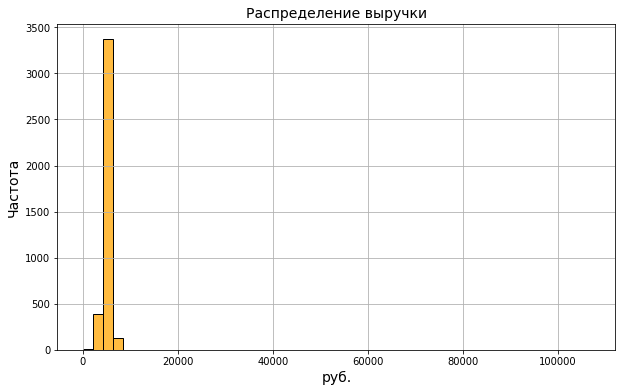

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=market_money['выручка'], bins=50, color='orange')
plt.title(f'Распределение выручки', fontsize=14)
plt.xlabel(f'руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()

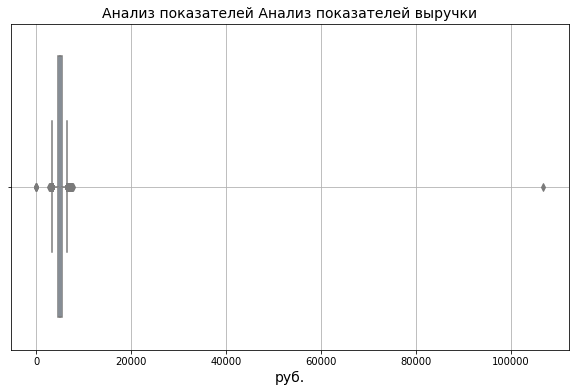

In [39]:
g_box(market_money, 'выручка', 'Анализ показателей выручки', 'руб.')
plt.show()

**Поскольку в описании отсутствует информация о единицах измерения выручки, представленных в таблице - беру за основу рубли в ед.**

*Сразу видим аномальные значения 0 и за 100000. Такое в реальности явление вероятно: один из всей совокупности не купил ничего, а другой покупатель забрал в 20 раз больше остальных. Но выглядит слишком подозрительно, заменю эти значения*

In [40]:
display(market_money[market_money['выручка'] > 20000])
#Определили аномальную запись №98, заменим на медианное значение для текущего_периода
display(market_money[market_money['выручка'] == 0])
#Это новые пользователи, по заданию уберу их из таблиц

,id,период,выручка
98,215380,текущий_месяц,106862.2


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [41]:
median_current = market_money.loc[market_money['период'] == 'текущий_месяц', 'выручка'].median()
market_money['выручка'] = market_money['выручка'].replace(106862.2, median_current)

ids_to_remove = market_money[market_money['выручка'] == 0]['id'].unique()

market_file = market_file[~market_file['id'].isin(ids_to_remove)]
market_file.reset_index(drop=True, inplace=True)
market_money = market_money[~market_money['id'].isin(ids_to_remove)]
market_money.reset_index(drop=True, inplace=True)
market_time = market_time[~market_time['id'].isin(ids_to_remove)]
market_time.reset_index(drop=True, inplace=True)
money = money[~money['id'].isin(ids_to_remove)]
money.reset_index(drop=True, inplace=True)
#Готово, теперь снова построим график распределения выручки

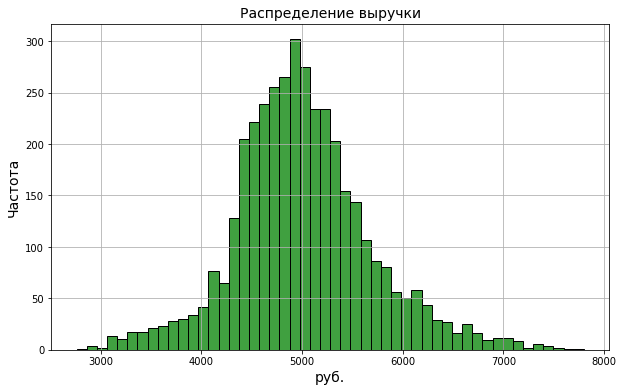

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=market_money['выручка'], bins=50, color='green')
plt.title(f'Распределение выручки', fontsize=14)
plt.xlabel(f'руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()

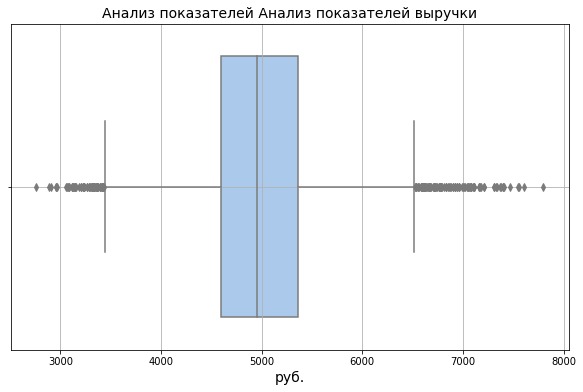

In [43]:
g_box(market_money, 'выручка', 'Анализ показателей выручки', 'руб.')
plt.show()

**Теперь распределение выручки нормальное! Согласно графику размаха у нас есть выбросы, но такая ситуация реальная.**

*Нормальные для выборки значения выручки расположились от ~4500.р. до ~5500.р. от клиента*

период,препредыдущий_месяц,предыдущий_месяц,текущий_месяц
выручка,6272769.0,6417996.5,6793752.45


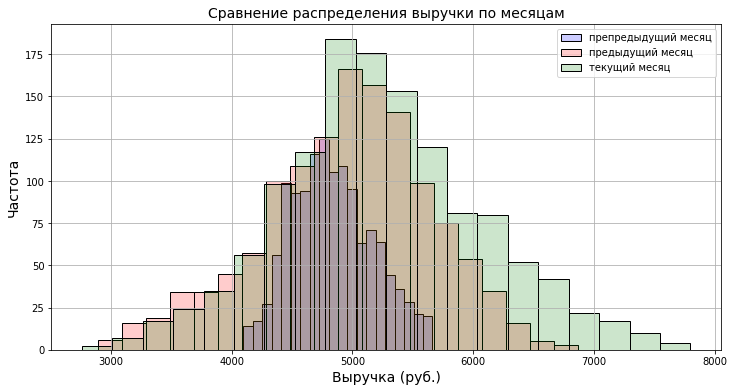

In [44]:
money_periods_sum = pd.pivot_table(market_money, values='выручка', columns='период', aggfunc=(sum))
money_periods_sum = money_periods_sum[[ 'препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']]
display(money_periods_sum)

money_periods = market_money.pivot(index='id', values='выручка',columns='период')
money_periods = money_periods[[ 'препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']]

plt.figure(figsize=(12,6))
sns.histplot(data=money_periods['препредыдущий_месяц'], bins=20, 
             alpha=0.2, color='blue', ec='black', label='препредыдущий месяц')
sns.histplot(data=money_periods['предыдущий_месяц'], bins=20, 
             alpha=0.2, color='red', ec='black', label='предыдущий месяц')
sns.histplot(data=money_periods['текущий_месяц'], bins=20, 
             alpha=0.2, color='green', ec='black', label='текущий месяц')

plt.title(f'Сравнение распределения выручки по месяцам', fontsize=14)
plt.xlabel(f'Выручка (руб.)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**Получаем, что за текущий месяц общая выручка выше, чем за остальные. Меньше всего выручка за препредыдущий месяц**

### Анализ данных в таблице market_time

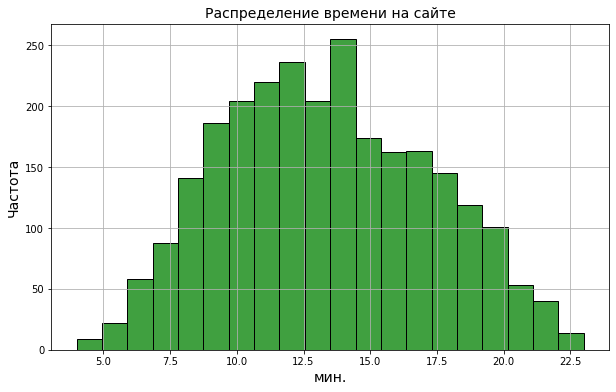

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=market_time['минут'], bins=20, color='green')
plt.title(f'Распределение времени на сайте', fontsize=14)
plt.xlabel(f'мин.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()

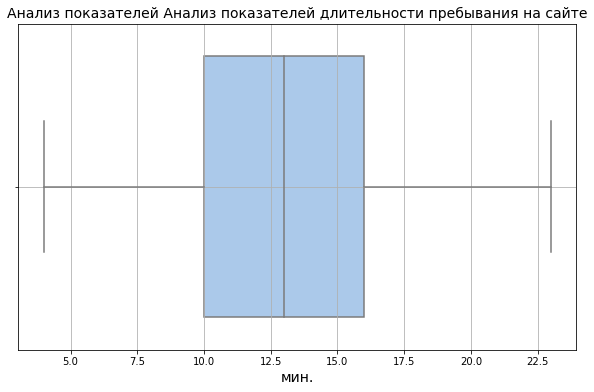

In [46]:
g_box(market_time, 'минут', 'Анализ показателей длительности пребывания на сайте', 'мин.')
plt.show()

**Распределение нормально. Выбросов нет! Нормальное время пребывания на сайте от ~10 до ~15.5 минут.**

период,предыдущий_месяц,текущий_месяц
минут,17470,17135


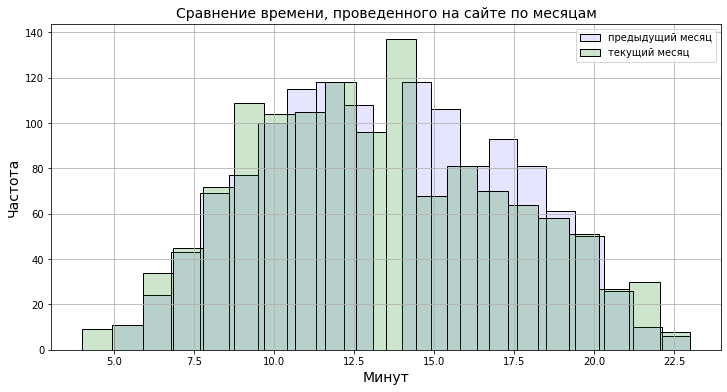

In [47]:
money_times_sum = pd.pivot_table(market_time, values='минут', columns='период', aggfunc=(sum))
display(money_times_sum)

money_times = market_time.pivot(index='id',values = 'минут', columns='период')

plt.figure(figsize=(12,6))
sns.histplot(data=money_times['предыдущий_месяц'], bins=20, 
             alpha=0.1, color='blue', ec='black', label='предыдущий месяц')
sns.histplot(data=money_times['текущий_месяц'], bins=20, 
             alpha=0.2, color='green', ec='black', label='текущий месяц')

plt.title(f'Сравнение времени, проведенного на сайте по месяцам', fontsize=14)
plt.xlabel(f'Минут', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**В целом, общее время проведенное клиентами на сайте незначительно больше за предыдущий период, чем за текущий. Всего на 335 минуты или примерно 5.5 часов.**

### Анализ данных в таблице money

*Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.*

*P.S. полагаю, исчисляется в тыс.руб. на этот раз (Неплохо бы уточнить, как и в случае с выручкой)*

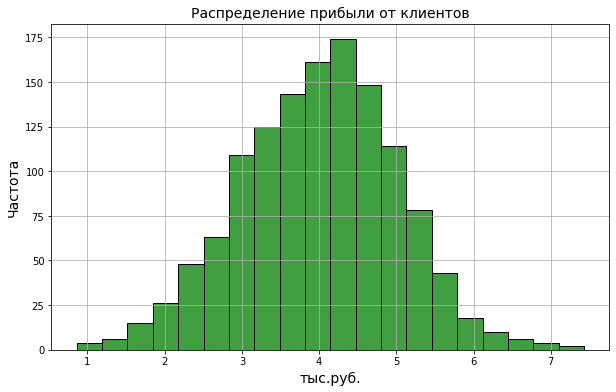

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=money['прибыль'], bins=20, color='green')
plt.title(f'Распределение прибыли от клиентов', fontsize=14)
plt.xlabel(f'тыс.руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()


**Распределение прибыли нормальное. Чаще всего клиенты приносят ~4.5 тыс.руб. прибыли**

### Итог раздела:
- **Рассмотрел и описал распределение признаков всех четырех таблиц;**
- **Очистил от выбросов и новых пользователей таблицы;**
- **На сайте преобладают клиенты со стандартным тип сервиса и разрешенными рассылками по дополнительным предложениям;**
- **Самые популярные категории Домашний текстиль и Товары для детей, реже всего встречается категория Кухонная посуда;**
- **Выручка в текущем месяце больше, чем предыдущих. На протяжении 3х месяцев выручка растет;**
- **Общее время, проводимое на сайте клиентами, уменьшилось в текущем месяце.**

**Портрет обычного клиента: тип сервиса - стандарт, подписан на рассылки, интересуется товарами для детей/домашним текстилем, количество маркетинговых коммуникаций = 4, дней с момента его регистрации = 400-800, просматривает от 5 до 10 страниц за визит, приносит выручку в среднем размере 5000руб.**

## Объединение таблиц

*Сперва отформатируем таблицу market_money для последующего объединения*

In [49]:
def df_split(df,b,c):
    return df.loc[df['период'] == b, ['id',c]]

In [50]:
market_money_new = market_money.copy()

market_tek = df_split(market_money_new, 'текущий_месяц', 'выручка').reset_index(drop=True)
market_tek.columns=['id', 'выручка_за_текущий_месяц']
market_pred = df_split(market_money_new, 'предыдущий_месяц', 'выручка').reset_index(drop=True)
market_pred.columns=['id', 'выручка_за_предыдущий_месяц']
market_prepred = df_split(market_money_new, 'препредыдущий_месяц', 'выручка').reset_index(drop=True)
market_prepred.columns=['id', 'выручка_за_препредыдущий_месяц']

market_money_new = market_tek.merge(market_pred, on='id', how='left')
market_money_new = market_money_new.merge(market_prepred, on='id', how='left')
market_money_new.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1297 non-null   int64  
 1   выручка_за_текущий_месяц        1297 non-null   float64
 2   выручка_за_предыдущий_месяц     1297 non-null   float64
 3   выручка_за_препредыдущий_месяц  1297 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 40.7 KB


*Теперь отформатируем таблицу market_time*

In [51]:
market_time_new = market_time.copy()
market_time_tek = df_split(market_time_new, 'текущий_месяц', 'минут').reset_index(drop=True)
market_time_tek.columns=['id', 'минут_за_текущий_месяц']
market_time_pred = df_split(market_time_new, 'предыдущий_месяц', 'минут').reset_index(drop=True)
market_time_pred.columns=['id', 'минут_за_предыдущий_месяц']

market_time_new = market_time_tek.merge(market_time_pred, on='id', how='left')
market_time_new.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   id                         1297 non-null   int64
 1   минут_за_текущий_месяц     1297 non-null   int64
 2   минут_за_предыдущий_месяц  1297 non-null   int64
dtypes: int64(3)
memory usage: 30.5 KB


In [52]:
big_data = market_file.copy()
big_data_2 = market_money_new.merge(market_time_new, on='id', how='left')
big_data = big_data.merge(big_data_2, on='id', how='left')

**Таблицы успешно объединили согласно заданию. Далее переходим к корреляционному анализу.**

## Корреляционный анализ

### Анализ зависимости признаков методом phik

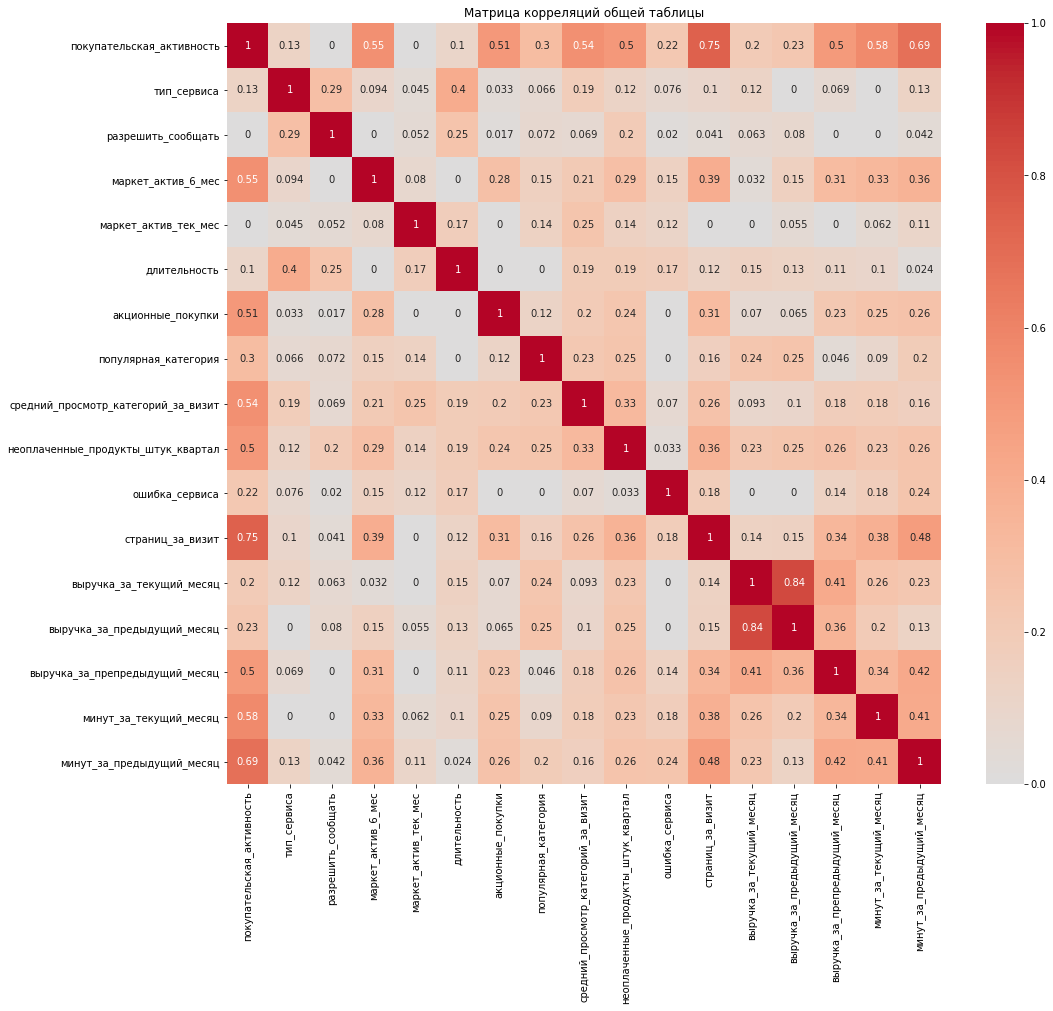

In [53]:
full_corr=big_data.drop('id', axis=1).copy()

col_names_corr = full_corr.select_dtypes(include='number').columns.to_list()

big_data_corr = full_corr.phik_matrix(interval_cols=col_names_corr)

plt.figure(figsize=(16,14))
sns.heatmap(big_data_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций общей таблицы')
plt.show()

**Признаки имеющие зависимость с Покупательской способностью на основе корреляционного анализа:**
- Сильнее всего покупательская способность связана со **средним количеством страниц**, которых просмотрел покупатель за один визит на сайт за последние 3 месяца. Коэффициент корреляции 0.75, означает больше страниц просмотрел = с большей вероятностью купил;
- Далее заметная зависимость между Покупательской способностью и значением **времени, проведённым на сайте**, в минутах. 0.58 с текущим месяцем и 0.69 с предыдущим. Это объясняется тем, что в предыдущем общее время проведенное клиентами на сайте было больше, чем в текущем отсюда и более крепкая зависимость: больше времени на сайте провел = с большей вероятностью купил;
- **Средний просмотр категорий за визит** дает коэффициент 0.54, люди с хорошей покупательской активностью смотрят больше категорий;
- Клиентам с активной покупательской способностью также свойственно добавлять больше **продуктов в корзину и не оплачивать ее** (для сравнения или в ожидании будущих акций);
- **Cреднемесячная доля покупок по акции** от общего числа покупок за последние 6 месяцев показывает коэффициент 0.51. Для активных покупателей скидочные товары играют большую роль в списке их покупок;
- **Среднемесячное значение маркетинговых коммуникаций компании**, которое приходилось на покупателя за последние 6 месяцев. Коэффициент корреляции 0.55 означает, что число коммуникаций с активными клиентами чаще всего больше, что логично;
- Далее видим посещение **Популярной категории** с кэффом 0.3, но тут скорее частный случай от общего количества просмотров категорий;
- **Ошибка сервиса** с коэффициентом 0.22 - слабая зависимость. Больше времени проводишь на сайте и активнее все кликаешь = больше вероятность напороться на баги.


*Ранее я выдвигал предположение насчет типа сервиса и разрешений на доп. рассылки. Корреляционный аналзи заявляет, что зависимости с целевым признаком нет. Возможно присутствует нелинейная зависимость, которую система пока не видит, либо моя гипотеза не оправдала себя, будем смотреть дальше при моделировании иоценке влияния признаков.*

**Признаки, не вошедшие в мой "блок важности":**
- **Выручка за текущий / предыдущий / препредыдущий месяц**. Поскольку значения коррелируют плотно между друг другом, что может запутать модель и стать причиной увеличения ошибок на предсказании;
- Остальные признаки с отсутсвием корреляционной зависимости с ключевым признаком.

In [54]:
group_down_сorr = big_data[full_corr['покупательская_активность'] == 'снизилась'].copy()

group_same_сorr = big_data[full_corr['покупательская_активность'] == 'прежний_уровень'].copy()

In [55]:
def g_scatter_corr(x,y,hue,a):
    plt.figure(figsize=(12, 6))

    sns.scatterplot(data=group_down_сorr, x=x, y=y, alpha=0.5, color='blue', label='Снизилась активность')
    sns.scatterplot(data=group_same_сorr, x=x, y=y, alpha=0.5, color='orange', label='Прежний уровень активности')

    plt.title(f'Сравнение распределения {a}', fontsize=14)
    plt.xlabel(f'{x}', fontsize=14)
    plt.ylabel(f'{y}', fontsize=14)
    plt.legend(loc='upper right')
    plt.show()

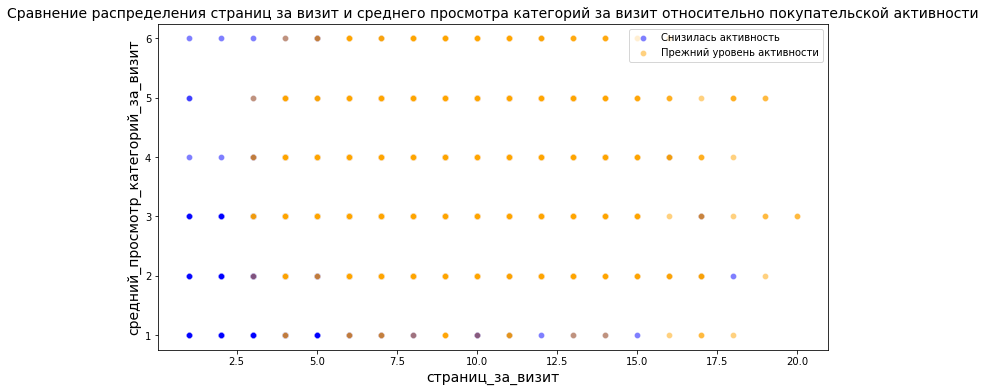

In [56]:
g_scatter_corr('страниц_за_визит', 'средний_просмотр_категорий_за_визит',
              'покупательская_активность', 
               'страниц за визит и среднего просмотра категорий за визит относительно покупательской активности')


**Наблюдаем довольно четкое разделение по целевому признаку. Чем больше просмотрено страниц и категорий - тем больше вероятность отнести покупательскую способность к активной.**

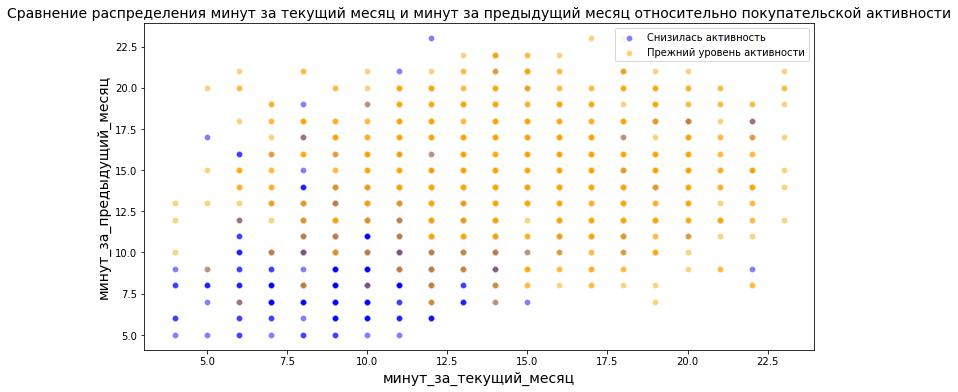

In [57]:
g_scatter_corr('минут_за_текущий_месяц', 'минут_за_предыдущий_месяц',
              'покупательская_активность', 
               'минут за текущий месяц и минут за предыдущий месяц относительно покупательской активности')

**Снова видим четкое разделение по целевому признаку. Чем больше проведено на сайте минут за предыдущий и текущий месяц - тем больше вероятность отнести покупательскую способность клиента к активной.**

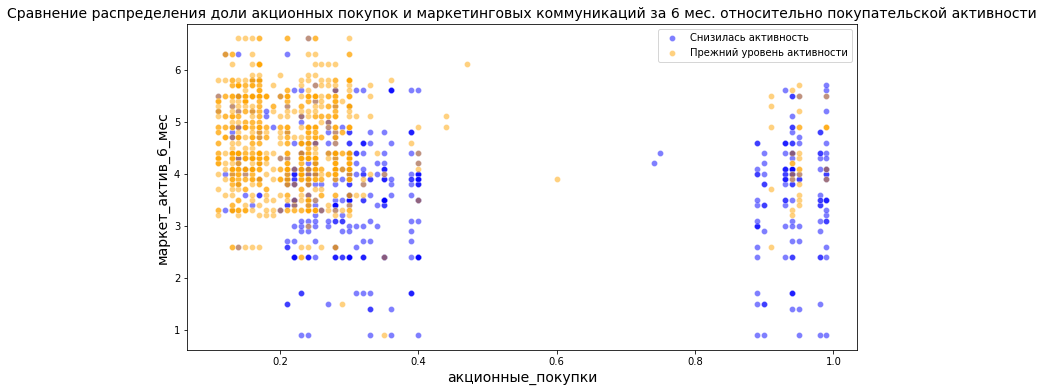

In [58]:
g_scatter_corr('акционные_покупки', 'маркет_актив_6_мес', 
              'покупательская_активность', 
               'доли акционных покупок и маркетинговых коммуникаций за 6 мес. относительно покупательской активности')

**Наблюдается кластеризация по акционным покупкам. Четкой взаимосвязи нет. У покупателей с прежней активностью  маркетинговых коммуникаци больше, а доля акционных покупок меньше.**

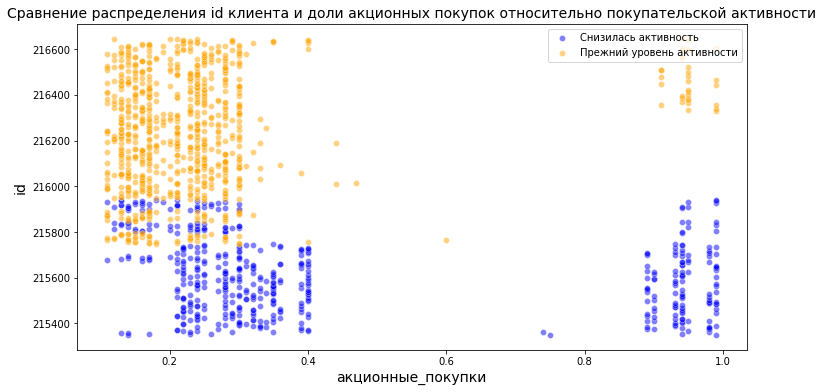

In [59]:
g_scatter_corr('акционные_покупки', 'id',  
              'покупательская_активность', 
               'id клиента и доли акционных покупок относительно покупательской активности')

**Наблюдаем четкую кластеризацию по покупательской активности. Как и говорил ранее: скорее всего клиенты со сниженной активностью стараются совершать покупки в акционные периоды. Доля акционных покупок выше, чем у клиентов с прежним уровнем активности, а иногда составляет 100% от общих покупок = не самый обеспеченный финансово сегмент покупателей, либо они активно сравнивают и находят дешевле у конкурентов.**

In [60]:
test_momey_check = big_data.copy()
down_corr = test_momey_check[test_momey_check['покупательская_активность'] == 'снизилась'].copy()
same_corr = test_momey_check[test_momey_check['покупательская_активность'] == 'прежний_уровень'].copy()

down_corr['дифф_предыдущий_препредыдущий'] = down_corr['выручка_за_предыдущий_месяц'] - down_corr['выручка_за_препредыдущий_месяц']
down_corr['дифф_текущий_предыдущий'] = down_corr['выручка_за_текущий_месяц'] - down_corr['выручка_за_предыдущий_месяц']

same_corr['дифф_предыдущий_препредыдущий'] = same_corr['выручка_за_предыдущий_месяц'] - same_corr['выручка_за_препредыдущий_месяц']
same_corr['дифф_текущий_предыдущий'] = same_corr['выручка_за_текущий_месяц'] - same_corr['выручка_за_предыдущий_месяц']

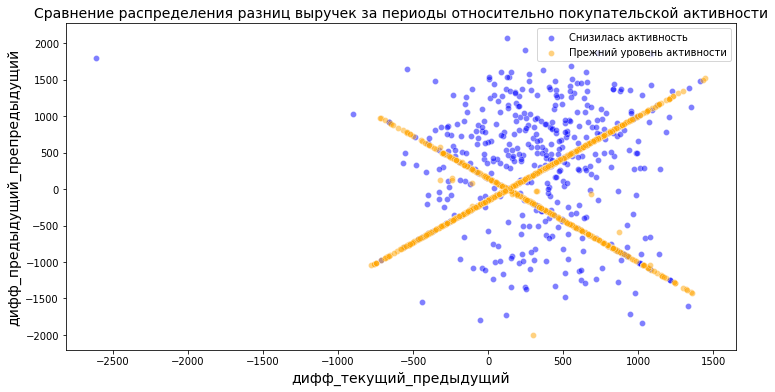

In [61]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=down_corr, x='дифф_текущий_предыдущий', y='дифф_предыдущий_препредыдущий', 
                alpha=0.5, color='blue', label='Снизилась активность')
sns.scatterplot(data=same_corr, x='дифф_текущий_предыдущий', y='дифф_предыдущий_препредыдущий', 
                alpha=0.5, color='orange', label='Прежний уровень активности')

plt.title(f'Сравнение распределения разниц выручек за периоды относительно покупательской активности', fontsize=14)
plt.xlabel(f'дифф_текущий_предыдущий', fontsize=14)
plt.ylabel(f'дифф_предыдущий_препредыдущий', fontsize=14)
plt.legend(loc='upper right')
plt.show()

**Для класса сниженной активности ситуация вполне обычная. А вот с классом прежнего уровня активности: точки строго лежат на двух пересекающихся линиях, это может указывать на ограниченное число уникальных значений разниц выручек. Например:
Выручка за все периоды близка по величине (вплоть до одинаковой), что приводит к одинаковым значениям разниц.**

### Дополнительная проверка на мультиколлинеарность методом VIF

**Проведу дополнительную проверку на мультиколлинеарность:**

In [62]:
vif_data = full_corr.select_dtypes(include=['int', 'float', 'bool'])
vif_data = vif_data.assign(const=1)  # Добавляю константу для корректного расчета VIF

# Определяю список количественных признаков (без константы)
quantitative_features = [col for col in vif_data.columns if col != 'const']

# Вычисляю VIF для каждого признака
vif = pd.DataFrame()
vif['Входной признак'] = quantitative_features
vif['Показатель VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(len(quantitative_features))]
vif = vif.sort_values(by='Показатель VIF', ascending=False)

# Отображаю результат
display(vif)

,Входной признак,Показатель VIF
9,выручка_за_предыдущий_месяц,4.244971
8,выручка_за_текущий_месяц,3.878492
10,выручка_за_препредыдущий_месяц,1.612535
12,минут_за_предыдущий_месяц,1.526995
7,страниц_за_визит,1.417355
11,минут_за_текущий_месяц,1.321058
0,маркет_актив_6_мес,1.221878
5,неоплаченные_продукты_штук_квартал,1.198192
3,акционные_покупки,1.186281
4,средний_просмотр_категорий_за_визит,1.178636


**Принято считать уровень мультиколлинеарности коэффициентов VIF в диапозоне от 1 до 10, где 10 - самая высокая степень мультиколлинеарности. В целом, у нас не высокие коэффициенты, но, как я и говорил ранее, меня настораживает влияние совместной зависимости типов выручки, что может сбить с толку модель. 3.8 и 4.2 - заметно выделяются на фоне остальных.**

**Что касается остальных признаков - попробую добавить их полиномы и посмотреть итоговые результаты значимости признаков.**

### Проанализируем наши признаки подробнее перед началом работы с пайплайном

Хочу сначала выгрузить все признаки в логистическую модель + добавить полиномиальные и проверить их уровень линейной значимости.

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


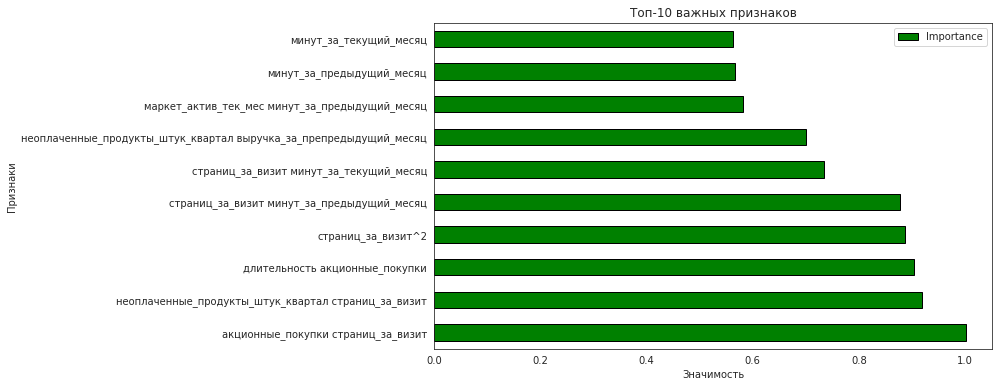

In [63]:
test_cat_names = full_corr.select_dtypes(exclude='number').columns.tolist()

r_s = 45
t_s = 0.25

X_l = full_corr.drop(test_cat_names, axis=1)
y_l = full_corr['покупательская_активность']

X_train_l,X_test_l,y_train_l,y_test_l = train_test_split(X_l,y_l,test_size=t_s, random_state=r_s)

poly = PolynomialFeatures(2)
X_train_p = poly.fit_transform(X_train_l)
X_test_p = poly.transform(X_test_l)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_p), columns=poly.get_feature_names_out())
X_test_scaled = pd.DataFrame(scaler.transform(X_test_p), columns=poly.get_feature_names_out())

# Обучение модели с увеличением max_iter и использованием решателя 'saga'
model = LogisticRegression(
        random_state=r_s,
        solver='saga',  # Поддерживает L1-регуляризацию
        penalty='l1',
)
model.fit(X_train_scaled, y_train_l)

# Визуализация важности признаков (если model.coef_ существует)
coefficients = model.coef_[0]  # Получаем коэффициенты модели
feature_importance = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': np.abs(coefficients)})

# Сортируем по важности признаков и выбираем 10 лучших
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

# Визуализация 10 лучших признаков
sns.set_style('white')
top_features.plot(x='Feature', y='Importance', kind='barh', color='green', ec='black', figsize=(10, 6))
plt.title("Топ-10 важных признаков")
plt.xlabel("Значимость")
plt.ylabel("Признаки")
plt.show()

**Получаем наиболее эффективные наборы количественных параметров, выручки смело уберем из таблицы для пайплайна**

**Полиномиальные признаки в топ 10 тоже не попали**

### Итог раздела:
- **Проанализировал признаки таблицы на наличие корреляционной зависимости;**
- **Проверил на мультиколлинеарность;**
- **Тестово проверил количественные признаки на значимость для базовой модели.**

## Использование пайплайнов

In [64]:
full_corr = full_corr.drop(['выручка_за_текущий_месяц', 'выручка_за_предыдущий_месяц','выручка_за_препредыдущий_месяц'], axis=1)
cat_names = full_corr.select_dtypes(exclude='number').columns.tolist()
cat_names = cat_names.remove('покупательская_активность')
num_names = full_corr.select_dtypes(include='number').columns.tolist()

***Таргетный признак закодирован LabelEncoder: 1 - снизилась, 0 - прежний_уровень***

In [70]:
X = full_corr.drop('покупательская_активность', axis=1)
y = full_corr['покупательская_активность']

t_s = 0.25
r_s = 45

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=t_s,
                                                   random_state=r_s)

original_classes = ['снизилась', 'прежний_уровень']
le_custom = LabelEncoder()
le_custom.classes_ = np.array(original_classes)

y_train_encoded = le_custom.fit_transform(y_train)
y_test_encoded = le_custom.transform(y_test)

ohe_columns = [
    'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

num_columns = num_names


ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )
    ]
)

data_preprocessor = ColumnTransformer(
    [
    ('ohe_pipe', ohe_pipe, ohe_columns),
    ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)
    
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=r_s))
    ]
)

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=r_s)],
        'models__max_depth': range(2,10),
        'models__min_samples_leaf': range(1,6),
        'preprocessor__num': [StandardScaler(),MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(),MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=r_s,  probability=True)],
        'preprocessor__num': [StandardScaler(),MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=r_s)],
        'models__solver': ['saga'],
        'models__penalty': ['l1'],
        'models__max_iter': [2000],
        'preprocessor__num': [StandardScaler(),MinMaxScaler(), 'passthrough']
    }
]

grid_search = GridSearchCV(
    estimator=pipe_final,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train_encoded)

print('Метрика roc_auc для лучшей модели:\n', grid_search.best_score_)
print('\nЛучшая модель и ее параметры:\n\n', grid_search.best_estimator_)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Метрика roc_auc для лучшей модели:
 0.9098139475941467

Лучшая модель и ее параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_pipe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                               

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [71]:
pd.set_option('display.max_colwidth', None)
result=pd.DataFrame(grid_search.cv_results_)
display(result[
    ['rank_test_score','param_models','mean_test_score','params']
].sort_values('rank_test_score'))

,rank_test_score,param_models,mean_test_score,params
130,1,"SVC(probability=True, random_state=45)",0.909814,"{'models': SVC(probability=True, random_state=45), 'preprocessor__num': MinMaxScaler()}"
132,2,LogisticRegression(random_state=45),0.909468,"{'models': LogisticRegression(random_state=45), 'models__max_iter': 2000, 'models__penalty': 'l1', 'models__solver': 'saga', 'preprocessor__num': StandardScaler()}"
133,3,LogisticRegression(random_state=45),0.908722,"{'models': LogisticRegression(random_state=45), 'models__max_iter': 2000, 'models__penalty': 'l1', 'models__solver': 'saga', 'preprocessor__num': MinMaxScaler()}"
129,4,"SVC(probability=True, random_state=45)",0.908547,"{'models': SVC(probability=True, random_state=45), 'preprocessor__num': StandardScaler()}"
72,5,DecisionTreeClassifier(random_state=45),0.893911,"{'models': DecisionTreeClassifier(random_state=45), 'models__max_depth': 6, 'models__min_samples_leaf': 5, 'preprocessor__num': StandardScaler()}"
...,...,...,...,...
90,131,DecisionTreeClassifier(random_state=45),0.817683,"{'models': DecisionTreeClassifier(random_state=45), 'models__max_depth': 8, 'models__min_samples_leaf': 1, 'preprocessor__num': StandardScaler()}"
122,132,KNeighborsClassifier(),0.816680,"{'models': KNeighborsClassifier(), 'models__n_neighbors': 2, 'preprocessor__num': 'passthrough'}"
106,133,DecisionTreeClassifier(random_state=45),0.811343,"{'models': DecisionTreeClassifier(random_state=45), 'models__max_depth': 9, 'models__min_samples_leaf': 1, 'preprocessor__num': MinMaxScaler()}"
105,134,DecisionTreeClassifier(random_state=45),0.811292,"{'models': DecisionTreeClassifier(random_state=45), 'models__max_depth': 9, 'models__min_samples_leaf': 1, 'preprocessor__num': StandardScaler()}"


**Получается самой успешной стала модель SVC (метод опорных векторов), при использовании скейлера StandardScaler(). Для практики хочу попробовать применить дополнительно модель Random Forest.**


In [74]:
best_model = grid_search.best_estimator_

y_pred_proba_best = best_model.predict_proba(X_test)[:,1]
roc_auc_best = roc_auc_score(y_test_encoded, y_pred_proba_best)

print(f'Метрика ROC-AUC на тестовой выборке для модели SVC: {roc_auc_best.round(3)}')

Метрика ROC-AUC на тестовой выборке для модели SVC: 0.891


**Протестировал модель SVC из GridSearch и получили хороший результат метрики = 0.891**

### Итог раздела:
**Лучше всех из моделей справилась модель SVC(), у которой roc_auc метрика на тестовой выборке 0.891**

**Выбрал метрику roc_auc, потому что устойчива к несбалансированности классов. В отличие от метрик, основанных на фиксированном пороге (например, точность, ошибка), ROC AUC рассматривает как ложноположительные, так и ложноотрицательные ошибки, и позволяет оценить, насколько хорошо модель справляется с обеими ситуациями.**

## Анализ важности признаков

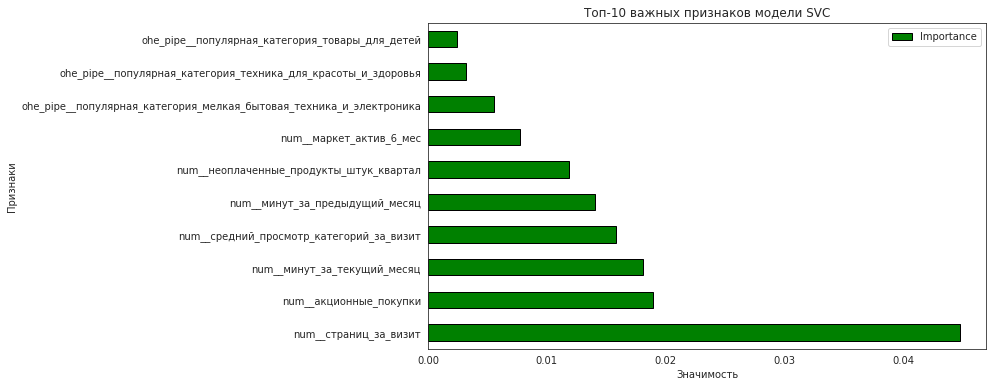

In [76]:
permutation = permutation_importance(best_model, X_test_preprocessed, y_test_encoded, scoring='roc_auc')

#Сортируем по важности признаков
feature_importance = pd.DataFrame({
    'Feature': data_preprocessor.get_feature_names_out(),
    'Importance': permutation.importances_mean  # Средняя важность признаков
})

#Сортируем по важности и выбираем 10 лучших
best_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

#Визуализация
sns.set_style('white')
best_features.plot(x='Feature', y='Importance', kind='barh', color='green', ec='black', figsize=(10, 6))
plt.title("Топ-10 важных признаков модели SVC")
plt.xlabel("Значимость")
plt.ylabel("Признаки")
plt.show()

In [ ]:
# Код reviewer
explainer = shap.Explainer(grid_search.best_estimator_.named_steps['models'].predict_proba, background, feature_names=data_preprocessor.get_feature_names_out())
shap_values = explainer.shap_values(X_train_preprocessed)
shap.summary_plot(shap_values[:,:,1], plot_type='bar', feature_names=feature_names, max_display=13)

explanation = shap.Explanation(shap_values[:,:,1], data=X_train_preprocessed, feature_names=data_preprocessor.get_feature_names_out())
shap.plots.beeswarm(explanation)

In [ ]:
data_preprocessor.get_feature_names_out()

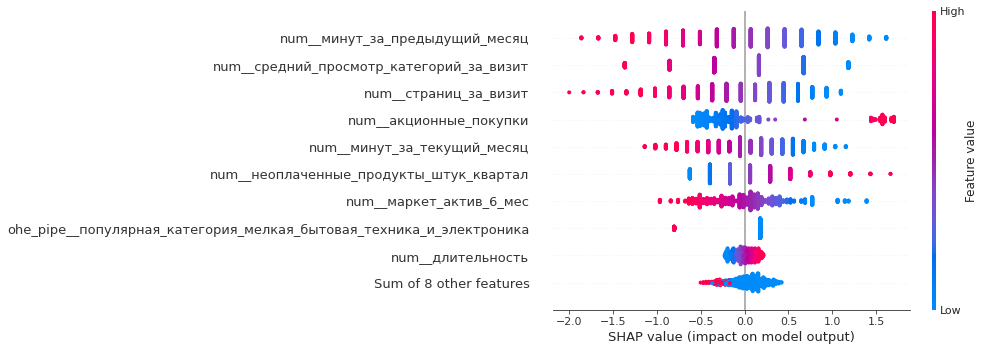

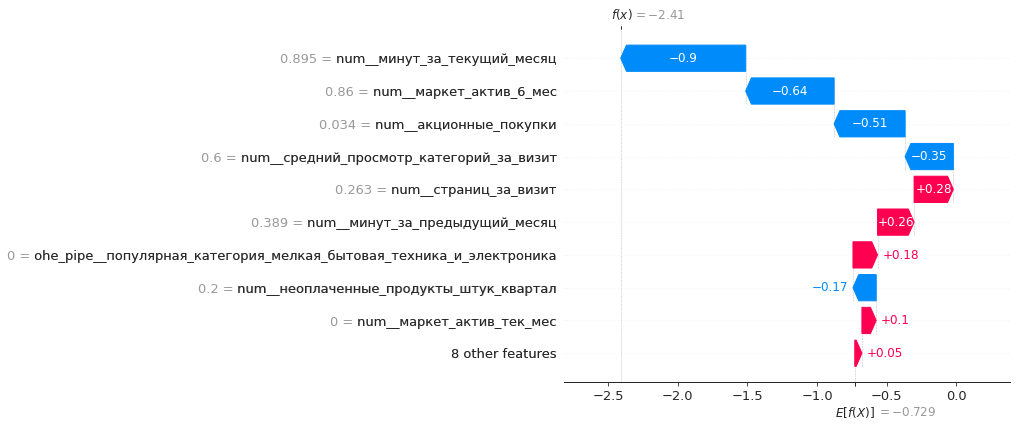

In [78]:
true_model = LogisticRegression(random_state=r_s, penalty='l1', solver='saga')
true_model.fit(X_train_preprocessed, y_train_encoded)

X_train_preprocessed = pd.DataFrame(data=X_train_preprocessed, columns=data_preprocessor.get_feature_names_out())
explainer_true = shap.LinearExplainer(true_model, X_train_preprocessed)
shap_values = explainer_true(X_train_preprocessed)



shap.plots.beeswarm(shap_values) 
shap.plots.waterfall(shap_values[1]) 

**На первом графике видим, как изменение значений каждого признака влияют на присвоение искомого класса**

*Например: страниц за визит -> большие показатели склоняют модель присвоить класс 0 (прежняя_активность), тогда как меньшие значения склоняют модель присвоить 1 (снизилась)*

**На втором графике смотрим единичный случай работы модели. Здесь значения признаков минут_за_текущий_месяц, маркет_актив_6_мес и акционные_покупки "перетянули на себя одеяло" и склонили модель присвоить класс 0 - прежняя покупательская активность**

### Итог раздела:
**Визуализировал важность признаков для интерпретации модели опорных векторов (SVC) и догистической регрессии;**

**Наиболее важные признаки для поддержания высокой покупательской активности:**
- число страниц, просмотренных за визит;
- значение времени в минутах, проведенное на сайте за текущий и предыдущий месяцы;
- среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
- количество маркетинговых коммуникаций с клиентом за последние 6 месяцев;
- сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

**Малозначимые признаки:**
- неоплаченные продукты шт. квартал - признак хорошо описывает целевой, но для бизнеса он не столь значим, нет идеи увеличивать количество неоплаченных продуктов в корзине;
- популярные категории - скорее как следствие просмотра категорий клиентами;
- запрет на дополнительные коммуникации - нет сильной зависимости с целевым признаком. 

## Сегментация покупателей

In [80]:
final_data = big_data.copy()
final_data = final_data.merge(money, how='left', on='id')

final_data['сегмент_прибыльности'] = pd.qcut(final_data['прибыль'], 
                                             q=3, 
                                             labels=['низкая', 'средняя', 'высокая']) 
#подсмотрел новый для себя способ сегментации в других источниках, в теории такого метода не было
final_data.head(10)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_текущий_месяц,выручка_за_предыдущий_месяц,выручка_за_препредыдущий_месяц,минут_за_текущий_месяц,минут_за_предыдущий_месяц,прибыль,сегмент_прибыльности
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4971.6,5216.0,4472.0,10,12,4.16,средняя
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8,3.13,низкая
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6610.4,6158.0,4793.0,13,11,4.87,высокая
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5872.5,5807.5,4594.0,11,8,4.21,средняя
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10,3.95,средняя
5,215354,снизилась,стандарт,да,5.1,3,431,0.23,косметика_и_аксессуары,2,3,7,2,5869.6,5685.0,4503.0,12,11,3.62,средняя
6,215355,снизилась,стандарт,нет,4.7,4,284,0.17,товары_для_детей,5,1,6,4,3772.6,3263.0,4749.0,10,12,5.26,высокая
7,215356,снизилась,стандарт,да,4.2,4,192,0.14,косметика_и_аксессуары,2,2,1,3,4566.4,4146.5,4433.0,7,6,4.93,высокая
8,215358,снизилась,стандарт,да,4.7,4,450,0.13,домашний_текстиль,4,2,6,4,4209.5,3488.0,4727.0,10,14,3.06,низкая
9,215360,снизилась,премиум,да,3.9,3,623,0.35,кухонная_посуда,3,1,4,7,5834.9,5304.5,5555.0,6,9,4.55,высокая


In [81]:
segments = final_data.groupby(['тип_сервиса', 'покупательская_активность', 'сегмент_прибыльности']).size()
display(segments)

тип_сервиса  покупательская_активность  сегмент_прибыльности
премиум      прежний_уровень            низкая                   67
                                        средняя                  69
                                        высокая                  70
             снизилась                  низкая                   63
                                        средняя                  49
                                        высокая                  57
стандарт     прежний_уровень            низкая                  204
                                        средняя                 195
                                        высокая                 197
             снизилась                  низкая                  102
                                        средняя                 116
                                        высокая                 108
dtype: int64

**Для исследования возьму клиентов с подпиской премиум, высокой прибыльностью и сниженной покупательской активностью. Эти люди были явно заинтересованы в использовании наших услуг и приносили хороший доход, подумаем, как вернуть их активность.**

In [82]:
target_group = final_data[
    (final_data['тип_сервиса'] == 'премиум') &
    (final_data['покупательская_активность'] == 'снизилась') &
    (final_data['сегмент_прибыльности'] == 'высокая')
]

check_group = final_data[
    (final_data['тип_сервиса'] == 'премиум') &
    (final_data['покупательская_активность'] == 'прежний_уровень') &
    (final_data['сегмент_прибыльности'] == 'высокая')
]

In [83]:
def final_check(target,bins,a,b):
    plt.figure(figsize=(10, 6))

    plt.hist(target_group[target], bins=bins, alpha=0.5, color='blue', label='Снизилась активность')
    plt.hist(check_group[target], bins=bins, alpha=0.5, color='orange', label='Прежний уровень активности')

    plt.title(f'Сравнение распределения {a}')
    plt.xlabel(f'{b}')
    plt.ylabel('Частота')
    plt.legend(loc='upper right')

    plt.show()

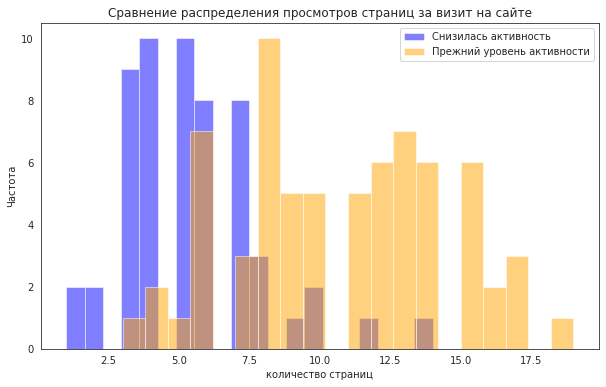

In [84]:
final_check('страниц_за_визит', 
            20, 
            'просмотров страниц за визит на сайте', 
            'количество страниц')

**На количестве просмотренных страниц хорошо видна разница. Стоит задуматься о способе привлечения или удержания внимания.**

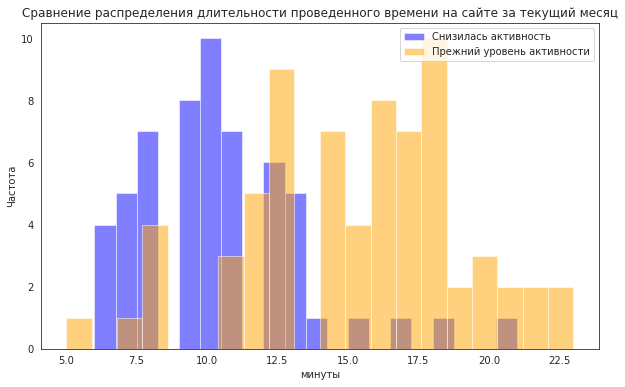

In [85]:
final_check('минут_за_текущий_месяц', 
            20, 
            'длительности проведенного времени на сайте за текущий месяц', 
            'минуты')

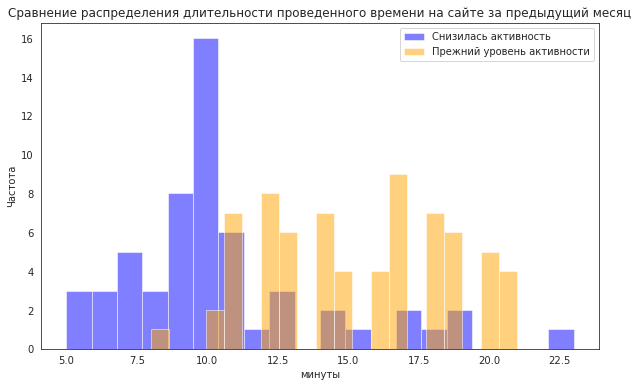

In [86]:
final_check('минут_за_предыдущий_месяц', 
            20, 
            'длительности проведенного времени на сайте за предыдущий месяц', 
            'минуты')

**Во времени, проведенном на сайте мы также наблюдаем четкую разницу. Больше активность = больше времени на сайте**

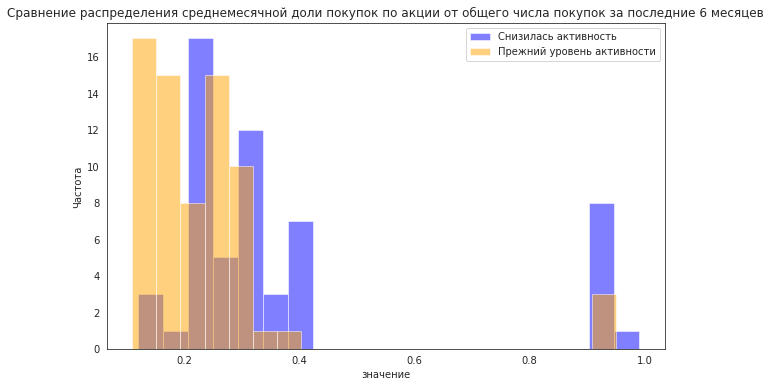

In [87]:
final_check('акционные_покупки', 
            20, 
            'среднемесячной доли покупок по акции от общего числа покупок за последние 6 месяцев', 
            'значение')

**С акционными товарами довольно интересная история. Получается у клиентов со сниженной активностью доля акционных товаров выше. Значит одной из причин снижения интереса мог стать рост цен на продукцию, либо редкие акционные кампании.**

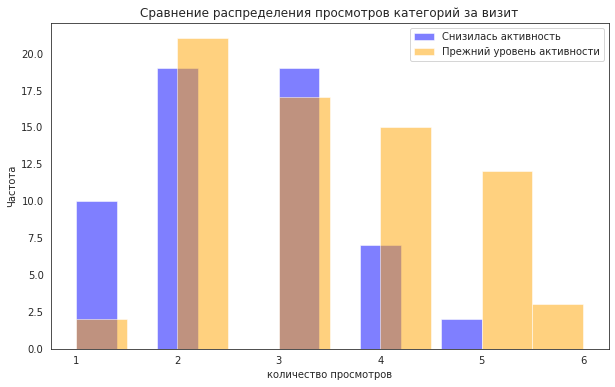

In [88]:
final_check('средний_просмотр_категорий_за_визит', 
            10, 
            'просмотров категорий за визит', 
            'количество просмотров')

**Клиенты с прежним уровнем покупательской активности просматривают больше категорий товаров. Можно подумать о более тонкой системе настройки рекомендаций на сайте**

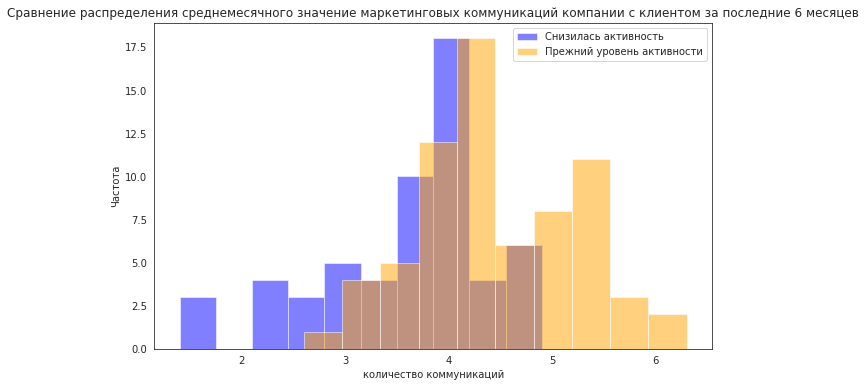

In [89]:
final_check('маркет_актив_6_мес', 
            10, 
            'среднемесячного значение маркетинговых коммуникаций компании с клиентом за последние 6 месяцев', 
            'количество коммуникаций')

**В ситуации с маркетинговыми коммуникациями мы также наблюдаем довольно четкую разницу в количестве. Стоит подумать, как можно снова привлечь внимание клиентов, возможно предложить промокод или персональную скидку.**

### Итог раздела:
**Для удержания покупательской активности клиентов предлагаю следующие решения:**

- Для увеличения времени пребывания на сайте и увеличения просмотра страниц и категорий: необходимо пересмотреть или внедрить новую систему рекомендаций для пользователей, чтобы точнее предсказывать их потребности. Также предлагаю рассмотреть возможности изменения оформления сайта или эргономику расположения ключевых блоков взаимодействия, чтобы он выглядел более привлекательным и удобным визуально.

- Уделить внимание ценовой политике и акционным кампаниям, поскольку клиенты с премиум подпиской и высокой прибылью для компании часто уделяют большое внимание именно акционным товарам (либо дорого, либо у конкурентов находят дешевле при сравнении).

- Пересмотреть частоту, формат и направление проводимых акционных кампаний.

## Общий вывод

**Задачей данного проекта являлось определение причин снижения покупательской активности клиентов и разработка решения, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.**

- ***Для увеличения времени пребывания на сайте и увеличения просмотра страниц и категорий необходимо: пересмотреть или внедрить новую систему рекомендаций для пользователей, чтобы точнее предсказывать их потребности (основой может стать метрика precision). Также предлагаю рассмотреть возможности изменения оформления сайта или эргономику расположения ключевых блоков взаимодействия, чтобы он выглядел более привлекательным и удобным визуально.***

- ***Уделить внимание ценовой политике и акционным кампаниям, поскольку клиенты с премиум подпиской и высокой прибылью для компании часто уделяют большое внимание именно акционным товарам (либо дорого, либо у конкурентов находят дешевле при сравнении).***

- ***Пересмотреть частоту, формат и направление проводимых акционных кампаний. Например, внедрить персональные скидки на избранные товары / предоставлять промокоды***

**Для поиска лучшей модели был использован метод GridSearchCV, поскольку выборка у нас была не большая, а метод повзоляет рассмотреть все возможные комбинации подбора параметров модели.**

**Лучшей моделью для оценки покупательской активности стала SVC() - метод опорных векторов. Хооршие результаты показали модели логистической регрессии и RandomForestClassifier.**

**Данные в изначальных таблицах были распределены нормально, пропусков и янвых дубликатов обнаружено не было. Были исправлены опечатки в значениях, убраны показатели новых клиентов. Провел исследовательский и корреляционный анализ признаков.**

